In [1]:
import sys; sys.path.append('../')

In [2]:
open_ai_api= open("../openai_api_key.key", "r").read()
from agents import Agent, OpenAIChatGPT, set_global_llm, set_live_verbosity

set_live_verbosity(0)
openai_llm = OpenAIChatGPT(
    api_key=open_ai_api,
    model="gpt-4o-mini",
    max_tokens=2000
)

set_global_llm(openai_llm)

/Users/voldemort/Desktop/personal_projects/arc-mlu/notebooks/../notebooks/arc_helper.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


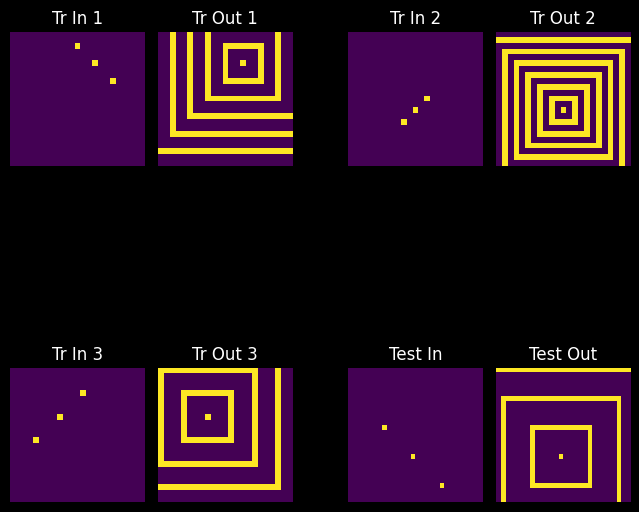

In [3]:
from notebooks.arc_helper import (convert_json_format, generate_string,
                                  plot_sample_matrices)

directory = "./ARC-800-tasks/training"  # Change this to your actual directory path
converted_data = convert_json_format(directory)
data=generate_string(converted_data)
plot_sample_matrices(converted_data[4])

In [4]:
from mlu import MLU

mlu = MLU(main_role="""
                    The goal is to construct the output grid(s) corresponding to the test input grid(s), 
                    using 3 trials for each test input. 'Constructing the output grid' involves picking 
                    the height and width of the output grid, then filling each cell in the grid with a symbol 
                    (integer between 0 and 9, which are visualized as colors). Learn to figure out the 
                    transformation rules and logic of image(matrix) from few given examples and apply it 
                    to the final test image(matrix). Analyze the given examples and predict the final 
                    image(matrix) for the given test image(matrix) and understand how to learn the spatial 
                    transformation rules, logic, pattern and concept of image(matrix) from few given examples to apply it 
                    to the final test image(matrix).
                    """,
    collection_name="knowledge_base_v-0.3-pattern_based",
    compress_knowledge=False,
    retrival_limit=15,
)

/opt/homebrew/Caskroom/miniconda/base/envs/voice-clone/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange



Starting Epoch 1



Training:   0%|          | 0/150 [00:00<?, ?it/s]Delete of nonexisting embedding ID: 900602eb-fd77-440d-91da-23cd8f046c9d
Delete of nonexisting embedding ID: 35be4c56-32d7-430d-889a-55adf7d9cecf
Delete of nonexisting embedding ID: ab94673c-c961-4f71-8061-0e272945b25c
Delete of nonexisting embedding ID: 7ef6171f-2be3-4b81-aa18-bed27804aa9a
Delete of nonexisting embedding ID: d68167c1-0d62-44f5-a2be-9f3635d96db5
Delete of nonexisting embedding ID: b8889f69-ee16-4070-a19e-9c38fe8d3825
Delete of nonexisting embedding ID: c3f6db60-d7f7-4f5b-b8a7-9ecd738c3f9c
Delete of nonexisting embedding ID: 97f8aba2-41e2-4972-a376-76a9fb496f2a
Delete of nonexisting embedding ID: 451b824a-254f-4d94-b22e-138bfeccfae0
Delete of nonexisting embedding ID: 28d6d6bc-e578-4796-8782-69a4111c35c3
Delete of nonexisting embedding ID: 9c5bb597-0aae-41e6-b42e-766f351579a2
Delete of nonexisting embedding ID: 950badc8-86d0-4b5c-8c5d-7f9d8ef1f142
Delete of nonexisting embedding ID: a7877d5e-9f95-4d6a-bea5-67eb133e54d5
De

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: 1cbd1d26-b72b-44e5-aa32-322677814795
Delete of nonexisting embedding ID: 2f4a210c-c891-4e76-a4c2-d4c44597fe13
Delete of nonexisting embedding ID: 7e96206f-d4b1-4156-975b-92405a3ed6dd
Delete of nonexisting embedding ID: 9a3ce90d-91d8-4ac6-a3cd-4430e0830e85
Delete of nonexisting embedding ID: df3aa5f2-88d6-4057-aa30-ada869a796a3
Delete of nonexisting embedding ID: e05f3056-e281-4fa5-b239-753ea6abcde7
Delete of nonexisting embedding ID: 73774b5d-9e18-4aea-adc3-b9aab9d37518
Delete of nonexisting embedding ID: 75a92f7f-3eb2-4c72-a649-0a500b07729b
Delete of nonexisting embedding ID: d48537a2-b44e-441a-98d1-dc6d4d72a214
Delete of nonexisting embedding ID: da4df36a-cdc5-4345-8a1a-b3a8df2d0738
Delete of nonexisting embedding ID: 74b6ffa1-43a8-49e5-89e0-b1ada78e6046
Delete of nonexisting embedding ID: 45dab7a6-84d9-4447-a685-3c95d5163997
Delete of nonexisting embedding ID: 3a900b67-b676-40c2-982e-45853a8c3cb0
Delete of nonexisting embedding ID: 803d117e-85c7-4

Pruned 15 old entries and added 4 new entries.

Learned Knowledge Update:
['Understanding how clusters of similar values influence transformations in a '
 'grid is essential for accurate predictions.',
 'Zeros act as critical delimiters, influencing the transformation of adjacent '
 'values in the grid context.',
 'Training examples should encompass a broad range of cluster interactions to '
 'aid in understanding transformation nuances.',
 'It is crucial to analyze edge cases that could influence transformation '
 'patterns across various scenarios.',
 'Systematic application of transformation rules based on exemplar grids '
 'enhances overall prediction accuracy.']
DTW Score: 17.029386365926403


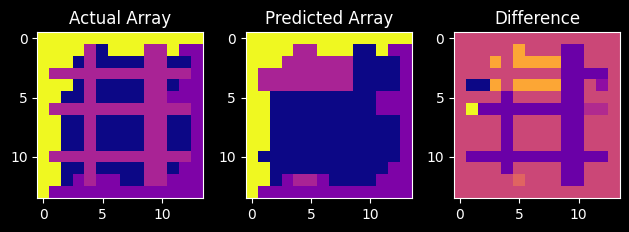

Training:   1%|          | 1/150 [01:26<3:35:28, 86.77s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: 1aff8c8d-8a6c-42f0-a4b8-803ee6937b39
Delete of nonexisting embedding ID: 61fe7e40-ca84-4c09-9c5d-fb399763a96a
Delete of nonexisting embedding ID: 66c07a4a-b2c6-4d76-84e1-37ed919d096b
Delete of nonexisting embedding ID: 281f8276-9278-411f-a47f-b3662e40fb1f
Delete of nonexisting embedding ID: 49ff7dcb-2e97-4066-9d01-38ae091fd9ac
Delete of nonexisting embedding ID: f56ecfd9-ab10-4890-bf4c-2a81a32fe1c7
Delete of nonexisting embedding ID: 9c321c90-3cb7-44f8-87d8-3baf56877ea3
Delete of nonexisting embedding ID: 2ba75b39-fc1e-43e7-bf04-17d6236c8a58
Delete of nonexisting embedding ID: 238e621b-4041-4372-b191-7966d9bc88ed
Delete of nonexisting embedding ID: 23ac96f5-9b63-4ab8-8da6-bac062f243fb
Delete of nonexisting embedding ID: bb842b8b-3bd7-4437-b004-5141df52d871
Delete of nonexisting embedding ID: 10a30c7e-a5b8-42f9-84f5-7412bba12da7
Delete of nonexisting embedding ID: 36c6f497-05e7-4c23-93d4-1539a893732f
Delete of nonexisting embedding ID: 6f80007f-0730-4

Pruned 15 old entries and added 4 new entries.

Learned Knowledge Update:
['Clusters of numbers influence the final output based on their spatial '
 'relationships and the behavior of zeros acting as delimiters in the grid.',
 'Understanding how different integers interact with their neighbors is '
 'crucial for applying transformation rules effectively.',
 'Transformations depend on the configuration of adjacent cells; therefore, '
 'spatial awareness is essential when predicting outputs from input grids.',
 'Developing clear and systematic mapping rules for transformations is vital '
 'to derive accurate results, especially in complex grids.',
 'Engaging in diverse practice scenarios can reveal patterns in numerical '
 'transformations and solidify understanding of the transformation logic.',
 'Identifying critical numbers (like 2 and 3) that significantly impact '
 'transformation outcomes will enhance the correctness of the predicted '
 'outputs.']
DTW Score: 32.0


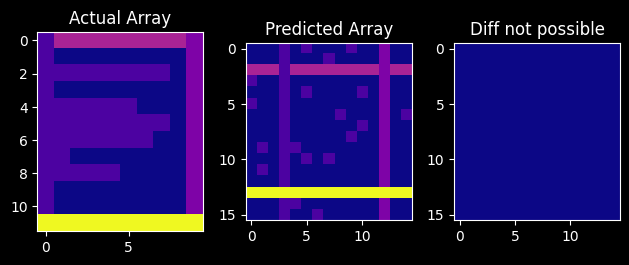

Training:   1%|▏         | 2/150 [03:16<4:07:25, 100.31s/it]

Pruned 15 old entries and added 1 new entries.


Delete of nonexisting embedding ID: 914c5450-4128-4e8d-901c-34a9c5a898bd
Delete of nonexisting embedding ID: e8e8bdce-c6ec-445f-ad2c-3fe98abbd785
Delete of nonexisting embedding ID: fbb393a9-3a47-4e41-9854-2a6e43dabe02
Delete of nonexisting embedding ID: bd250a0d-c303-40dc-bd6e-2a46d7ff6b09
Delete of nonexisting embedding ID: e1dfcdb2-021c-4265-a430-007cd541a129
Delete of nonexisting embedding ID: 79651481-8450-4d38-bf30-c44eee651b92
Delete of nonexisting embedding ID: 861972f7-aa6a-425d-a60b-1366c8d509f7
Delete of nonexisting embedding ID: 25dec30b-2157-42b8-b140-d99f26604508
Delete of nonexisting embedding ID: b91debf3-e80a-486b-bf07-f0ae6c51f826
Delete of nonexisting embedding ID: 0801f0af-5f74-4a94-ac3d-eb8b79484eb4
Delete of nonexisting embedding ID: da21e1af-1673-4a2c-8cfb-bc29e5adb8a1
Delete of nonexisting embedding ID: 81738c89-2b23-4aed-b8a2-877840742d79
Delete of nonexisting embedding ID: 04855450-1503-4d6f-ab04-221ff15303c3
Delete of nonexisting embedding ID: 6d5a3fa2-8d09-4

Pruned 15 old entries and added 4 new entries.

Learned Knowledge Update:
['Understanding of cluster propagation in matrix transformation: Clusters of '
 "integers (like '2's and '5's) must be understood in terms of their spatial "
 'relationships and how they affect one another, especially in the presence of '
 'zeros.',
 'Guideline on identifying impactful integers: Recognize which integers are '
 "crucial in transforming the input matrix; for instance, '5' tends to anchor "
 "clusters that '2's should expand from.",
 'Principle of boundary separation: Zeros create boundaries that influence how '
 'integer clusters grow or remain isolated, dictating their final arrangement '
 'in the output matrix.',
 'Rule for systematic mapping: Employ a step-by-step mapping of observed '
 'transformation rules, ensuring each cluster’s behavior aligns with '
 'previously seen transformations.',
 'Contextual application of observed examples: Apply insights gleaned from '
 'specific examples to new i

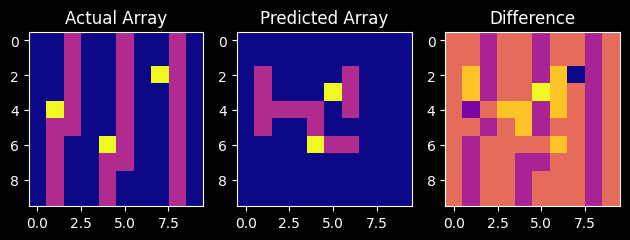

Training:   2%|▏         | 3/150 [04:46<3:54:14, 95.61s/it] 

Pruned 15 old entries and added 6 new entries.


Delete of nonexisting embedding ID: 23011b8c-8556-4fa1-9738-f055bdd37fe6
Delete of nonexisting embedding ID: 34645c25-6d46-46ae-98fa-79514f75eda7
Delete of nonexisting embedding ID: c10f7138-f537-4afa-80a7-4c8d26c09c57
Delete of nonexisting embedding ID: f9718f33-c68b-493e-bcf0-656aadd6a24f
Delete of nonexisting embedding ID: a98bd375-8a55-46b7-90e8-08942b0d3db5
Delete of nonexisting embedding ID: ceb9c6b6-7f90-4766-8a98-24ba50a5e1bb
Delete of nonexisting embedding ID: 58a65af8-39d7-4332-a305-e86b4d166fc7
Delete of nonexisting embedding ID: fa9965c2-def0-44d6-9558-33b8bb2eff93
Delete of nonexisting embedding ID: 4644d911-c57f-4e8c-8cab-78b2521004f7
Delete of nonexisting embedding ID: 94337a47-e667-46df-a117-2ea008e7489a
Delete of nonexisting embedding ID: 7cee57c3-109e-425f-91f0-28b4e727ed3d
Delete of nonexisting embedding ID: 33034fa7-ac27-4549-9a64-09fdafef46e0
Delete of nonexisting embedding ID: 5d50f807-2e02-4d06-9ce4-ed53d8a4f7c9
Delete of nonexisting embedding ID: 23011b8c-8556-4

Pruned 15 old entries and added 8 new entries.

Learned Knowledge Update:
['Understanding the role of zeros as boundary elements that can separate '
 'clusters in grid transformations. This understanding can improve the ability '
 'to predict how clusters interact and transform based on their spatial '
 'configuration.',
 'Recognizing clustering behavior among integers, particularly how certain '
 "integers influence each other's values. For instance, integers adjacent to a "
 'cluster can dictate whether a transformation occurs or if the status quo is '
 'maintained, especially in the presence of lower integers.',
 'The identification of spatial relationships in grid inputs is critical. '
 'Emphasize patterns where majority values retain unchanged status when '
 'surrounded by equal or lower values. This should aid in deriving '
 'transformation rules from given examples.',
 'Establishing systematic approaches for analyzing previous transformations '
 'can mitigate the repetition of p

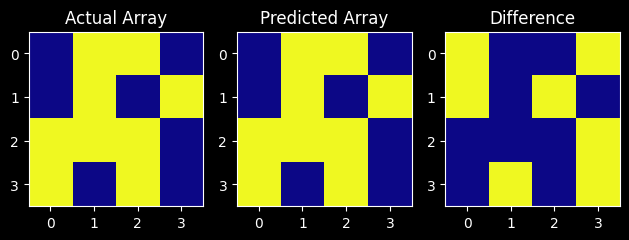

Training:   3%|▎         | 4/150 [06:17<3:48:35, 93.94s/it]

Pruned 15 old entries and added 6 new entries.


Delete of nonexisting embedding ID: 93e863d8-ac20-464f-9891-4e96409b66d2
Delete of nonexisting embedding ID: 57afeba3-4855-4fba-b0f7-6cf31fa10bf3
Delete of nonexisting embedding ID: 338d0b77-e5ec-4a55-b178-1434997e3974
Delete of nonexisting embedding ID: fcde74ae-76e5-4bad-843c-d24981b10d4a
Delete of nonexisting embedding ID: c1ca1d51-409b-498f-81f1-cd9f0d50143d
Delete of nonexisting embedding ID: 00ffc31c-3f67-4feb-9bd4-276b8be94efe
Delete of nonexisting embedding ID: 55a90bb9-41d6-41ca-9b76-9c87df6d22ac
Delete of nonexisting embedding ID: 8a9da839-09bf-4487-81fc-05a4e87944ba
Delete of nonexisting embedding ID: 0ae0ed77-bb82-4f74-8cb5-a7995f2ae758
Delete of nonexisting embedding ID: 12a1f649-2c9b-4703-aa93-56917622c03c
Delete of nonexisting embedding ID: 12d25508-6492-4e4a-9b65-fc7847f86fcd
Delete of nonexisting embedding ID: 2c67baba-5d74-44b2-ad11-fcadc4bcf1f3
Delete of nonexisting embedding ID: 5795fcc6-49e5-46d9-b9a7-55d1d7aa4543
Delete of nonexisting embedding ID: 93e863d8-ac20-4

Pruned 15 old entries and added 5 new entries.

Learned Knowledge Update:
['Understanding spatial transformation rules is crucial for accurate output '
 'generation in matrix-based tasks.',
 'Clusters of values have predictable transformation behaviors that depend on '
 'their arrangements; surrounding values significantly impact the outcome.',
 'When analyzing grid-based transformations, focus on boundaries as they can '
 'dictate the placement of key values in the output grid.',
 'Patterns should not be assumed uniform—thorough verification of positioning '
 'among clusters is needed to avoid inconsistencies in transformations.',
 'Trial runs should be methodically structured to ensure patterns are '
 'accurately analyzed and understood, particularly with regards to emergent '
 'properties of clusters.']
DTW Score: 0.0


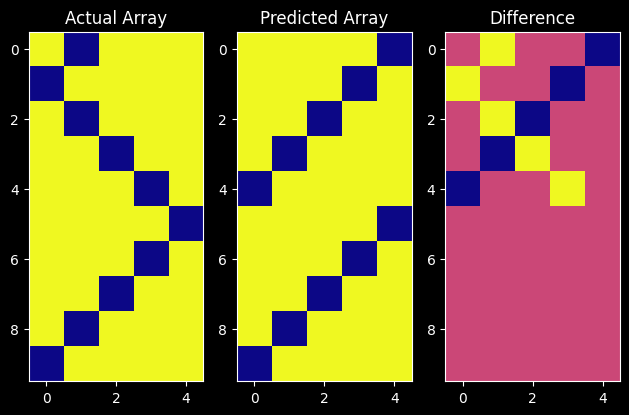

Training:   3%|▎         | 5/150 [07:33<3:30:57, 87.30s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: 4d4bbd39-78cd-46b1-8ddb-cb6749b51088
Delete of nonexisting embedding ID: 145cb0bf-baa4-43ed-a5ba-c3cc79874fa7
Delete of nonexisting embedding ID: 4f152a05-021f-4b47-8ee6-da30312a81ae
Delete of nonexisting embedding ID: eb02ff29-8afd-42f2-b55e-0c91fad5df9e
Delete of nonexisting embedding ID: c6875fb4-0ef4-481e-93e9-f41f4c9fa69b
Delete of nonexisting embedding ID: ffc02ec2-48f7-4c02-8075-a7219743c25f
Delete of nonexisting embedding ID: cf3cfa38-089a-4507-85b4-8597c6b19efc
Delete of nonexisting embedding ID: a8e3b5b2-7a2d-41e2-8a6c-2a5133256a93
Delete of nonexisting embedding ID: 74927b2c-bcd2-4323-8316-bc6c21085ef2
Delete of nonexisting embedding ID: f7101db7-bd83-467a-b338-57a61adda46a
Delete of nonexisting embedding ID: 979ab4be-51ef-47ef-93ca-d086f53dff14
Delete of nonexisting embedding ID: a6378fdb-0047-4753-98d2-fe9880dfcd02
Delete of nonexisting embedding ID: ef3a4ff6-182b-4583-a297-0b923d471d39
Delete of nonexisting embedding ID: 7070869c-dd4e-4

Pruned 15 old entries and added 4 new entries.

Learned Knowledge Update:
["Understanding how boundary values (specifically '0's) will constrain "
 'adjacent integers in transformation processes is fundamental for accurate '
 'output generation.',
 "The importance of recognizing and analyzing clusters of integers ('2's, "
 "'3's) to properly predict their behavior and transformation in grid outputs.",
 'Iterative refinement of predictions based on real-time feedback enhances '
 'accuracy in generating outputs from input grids.',
 'Establishing protocols for documentation of transformation patterns will '
 'improve consistency and repeatability in future tasks.',
 'Keeping track of the spatial relationships among integers within the grid '
 'can inform better placement and transformation decisions in outputs.']
DTW Score: 14.696938456699069


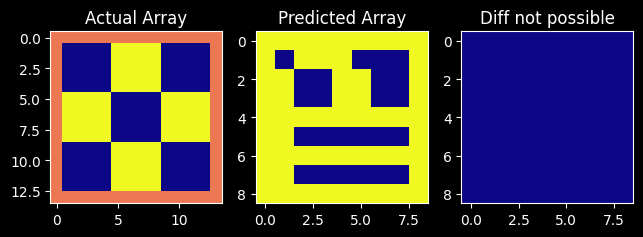

Training:   4%|▍         | 6/150 [08:43<3:15:36, 81.50s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: 08cd9dd7-e5bf-4458-9616-4a0d7ca104e7
Delete of nonexisting embedding ID: 27a39489-3ec5-4554-9a2d-fd81da05fc9a
Delete of nonexisting embedding ID: 0129f739-2d79-4718-a383-480fccd689b0
Delete of nonexisting embedding ID: 2678241a-9aa9-4d6c-a8d5-6d5a2aec58fe
Delete of nonexisting embedding ID: 0f5afe19-ec49-4c9a-93dc-a76570b49a54
Delete of nonexisting embedding ID: 9d331c94-e289-4510-a52f-c9042633f422
Delete of nonexisting embedding ID: f19a5fe7-f37f-4ee0-8ffe-b7ce4c08e650
Delete of nonexisting embedding ID: 7c420f96-9a02-4b5d-bd05-236f8b414450
Delete of nonexisting embedding ID: ed9466c6-b8ad-4ae1-83b5-405d27ae7aef
Delete of nonexisting embedding ID: 9acf5d15-bbe3-4ee3-9d43-f019a264710a
Delete of nonexisting embedding ID: 664d0551-4b8f-4995-b8f1-092c34bf8dea
Delete of nonexisting embedding ID: f8d206c1-751d-4099-a37a-222218790806
Delete of nonexisting embedding ID: e5f88ff0-7cc9-4430-a9c7-1ef99d147f69
Delete of nonexisting embedding ID: 08cd9dd7-e5bf-4

Pruned 15 old entries and added 4 new entries.

Learned Knowledge Update:
['The transformation of grids requires careful identification of how integer '
 'clusters interact with each other and with boundaries, as these interactions '
 'determine the output configuration.',
 'Accurate positioning of integers in the output grid is influenced by both '
 'their direct neighbors and their relative positions within the grid.',
 'Understanding the role of specific integers in the transformation process is '
 'critical; certain integers carry more weight in determining the output than '
 'others.',
 'Consistency in analyses of boundary interactions can greatly improve the '
 'quality of the output grid, as edges can define the transformation '
 'capabilities of the entire grid.',
 'Systematic review of previous examples and their transformations aids in '
 'recognizing patterns that should be utilized in constructing the output '
 'grid. The repetition of cluster influence is a key aspect to m

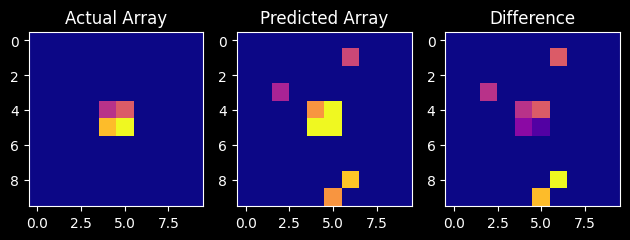

Training:   5%|▍         | 7/150 [09:49<3:02:18, 76.49s/it]

Pruned 15 old entries and added 6 new entries.


Delete of nonexisting embedding ID: 43a0677b-f14e-41cd-a117-7518cc485c63
Delete of nonexisting embedding ID: 1fd50ab8-5fb1-44a4-9cf3-e38a9830e6ac
Delete of nonexisting embedding ID: 085f28f6-a015-4340-aaa6-3ec24036b6af
Delete of nonexisting embedding ID: e38eba6d-b174-40ef-b2cb-1fa641b6bfc8
Delete of nonexisting embedding ID: 351993e0-3ee8-4be5-a3a6-f82c2963e7c3
Delete of nonexisting embedding ID: e280e3ba-6226-4a09-9a25-39065a813d0f
Delete of nonexisting embedding ID: 80c42eba-3f6f-4732-88d4-d7a1ecd558fe
Delete of nonexisting embedding ID: f8935392-a213-45b8-bf53-59680f352246
Delete of nonexisting embedding ID: e2b56c10-c8e5-4525-9df2-9926f66fcb9d
Delete of nonexisting embedding ID: edecc787-a931-4c2a-9f4c-2e9312dd921c
Delete of nonexisting embedding ID: 50ff9103-c5ec-473c-95d5-a77df66511d9
Delete of nonexisting embedding ID: a459a67f-9981-4ec0-8f8f-cb1f2d345845
Delete of nonexisting embedding ID: ca2d4bdb-2bd9-4707-a986-97e7eea149dd
Delete of nonexisting embedding ID: f791a736-fbfe-4

Pruned 15 old entries and added 4 new entries.

Learned Knowledge Update:
['Boundary conditions defined by zeros significantly influence surrounding '
 'integer transformations in matrix outputs. This rule applies in scenarios '
 'where zero values dictate the spatial arrangement of integers in an output '
 'grid. ',
 'The transformation logic should focus on the interaction of integer clusters '
 'and how their behavior impacts the resultant configurations in the output '
 'matrix. This principle holds when forecasting outputs from input grids of '
 'varying complexities.',
 "It's essential to review historical transformation examples thoroughly to "
 'identify specific patterns and relationships among integers that guide '
 'output creation. This guideline is applicable when faced with new '
 'transformation tasks.',
 'Practice with a diverse range of grid configurations enhances understanding '
 'and application of the transformation rules, which is necessary for '
 'achieving accur

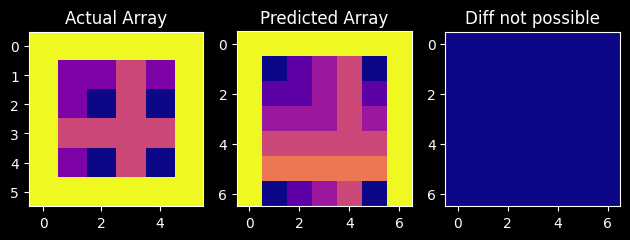

Training:   5%|▌         | 8/150 [10:51<2:49:53, 71.78s/it]

Pruned 15 old entries and added 8 new entries.


Delete of nonexisting embedding ID: 5b92d401-9580-48d3-b7e4-a2c9c7c09815
Delete of nonexisting embedding ID: 2ef64ae1-74bf-4e72-903e-5eecd2b43a94
Delete of nonexisting embedding ID: 97257442-71c5-4e90-9b52-c6bca84dfd59
Delete of nonexisting embedding ID: 85efca77-eb71-4f57-8998-2d2d8df4f862
Delete of nonexisting embedding ID: d09fcf5d-9e10-4f2b-8e25-7001b6a3c125
Delete of nonexisting embedding ID: 238d1272-b000-497c-89e2-861fb89ccb48
Delete of nonexisting embedding ID: af71a56a-11c3-4589-b806-f2b22d7d7f90
Delete of nonexisting embedding ID: 9542fbf7-7656-4718-86f6-d2b8821d686c
Delete of nonexisting embedding ID: d94bce75-a68e-4154-9264-57cd91021630
Delete of nonexisting embedding ID: f6729dae-6021-41a0-b3b3-9c8bb892bca5
Delete of nonexisting embedding ID: 62bfe0f1-1920-45d8-a21e-6e7be733db55
Delete of nonexisting embedding ID: b35560bd-5353-4bc2-a7ee-36a4ea77d055
Delete of nonexisting embedding ID: 53f223cc-ca4d-4c19-8dca-18317f3812b8
Delete of nonexisting embedding ID: bfd8b9f8-6eb1-4

Pruned 15 old entries and added 5 new entries.

Learned Knowledge Update:
["The presence of significant integers like '8' or '5' in a grid directly "
 'affects transformation rules and output patterns, necessitating careful '
 'observation of how these numbers interact spatially.',
 'Maintaining consistent patterns of significant integers across '
 'transformations is critical for achieving accuracy. Recognizing and '
 'replicating integer clusters ensures fidelity in output.',
 'Zeros serve as boundaries within grids and influence the arrangement of '
 'significant integers; understanding their role can help predict cluster '
 'behavior in transformations.',
 'Intensive trials and proper documentation of each grid transformation '
 'improve understanding of the rules governing spatial relationships and '
 'enable correct reproductions in future tasks.',
 'Visual aids can effectively assist in comprehending complex spatial '
 'relationships and patterns, enhancing overall task performa

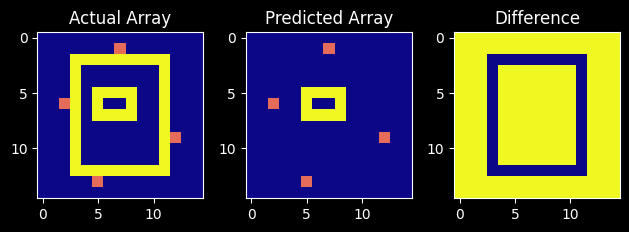

Training:   6%|▌         | 9/150 [12:19<3:00:34, 76.84s/it]

Pruned 15 old entries and added 6 new entries.


Delete of nonexisting embedding ID: 2dc2d455-3ba0-48fe-bc8f-ae610f8c1968
Delete of nonexisting embedding ID: 2a2ded34-2a45-4b2e-b9de-59aebb919ada
Delete of nonexisting embedding ID: adc914d6-81be-4751-b1ab-f9a6a0a29f37
Delete of nonexisting embedding ID: 81e74768-fcc0-493f-ab9f-59bc81036c25
Delete of nonexisting embedding ID: 8ef611f3-82b9-43f6-ab03-11c20a50cd5b
Delete of nonexisting embedding ID: 764cce31-9101-4795-8efb-94e97d5381df
Delete of nonexisting embedding ID: a0a46d72-ee9e-47e1-8faa-d0794381fe87
Delete of nonexisting embedding ID: 19345b7e-03d1-4d30-8e85-2c8f257a99f6
Delete of nonexisting embedding ID: 19ad87e9-7e43-4328-8c5a-3eaa44232363
Delete of nonexisting embedding ID: 0749dbe8-b0a5-4c94-8549-f87bca800d65
Delete of nonexisting embedding ID: cdc9f402-c917-4e91-8084-ec07e422e266
Delete of nonexisting embedding ID: 9110dca8-a01d-4c39-8ee0-bca3569c0aa4
Delete of nonexisting embedding ID: 6fd085f2-459b-4acc-b9c7-ab40e3824ab5
Delete of nonexisting embedding ID: 9c792963-ab5c-4

Pruned 15 old entries and added 4 new entries.

Learned Knowledge Update:
['Understanding of spatial relationships is critical for identifying how '
 'integers relate and transform in a grid context.',
 'Rule: Maintain integer clustering integrity when transforming grids to '
 'uphold the significance of numbers across transformations.',
 'Principle: Analyze and understand boundary conditions influenced by zeros in '
 'grid contexts, as they affect the placement and relationships of significant '
 'integers.',
 'Idea: Utilize visual aids to represent spatial transformations visually, '
 'improving comprehension of how inputs relate to outputs.',
 'Concept: Identify and categorize significant integers based on their '
 'patterns and frequencies in prior transformations to inform future '
 'placements.',
 'Rule: Implement systematic reviews of transformation logic from prior '
 'successful transformations to guide new predictions.',
 'Applicability: These knowledge entries apply to tasks

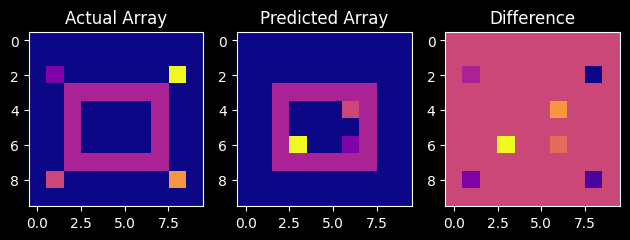

Training:   7%|▋         | 10/150 [13:36<2:59:19, 76.85s/it]

Pruned 15 old entries and added 6 new entries.


Delete of nonexisting embedding ID: e9527609-b3f9-4201-b909-2817a9e769ab
Delete of nonexisting embedding ID: 92197e4a-0cb2-4aa6-b838-e74909890a41
Delete of nonexisting embedding ID: c126bc24-392d-481e-8c91-1dc27e0834e2
Delete of nonexisting embedding ID: 097acb95-a406-434d-ba88-7e4823a3526f
Delete of nonexisting embedding ID: 126edd6d-c095-415c-8196-fb24785ff93a
Delete of nonexisting embedding ID: 405e7825-ab47-42cf-aa35-5acadc51f03b
Delete of nonexisting embedding ID: d6d8ff14-1b37-4acf-8427-bcbe510e9a49
Delete of nonexisting embedding ID: 3823ba22-24c7-4677-93c7-32ae24ea396b
Delete of nonexisting embedding ID: 20bbff9e-7c87-4106-b896-20c0611a4bd2
Delete of nonexisting embedding ID: 40007f7f-a947-40bc-8ee5-abdb84cf790b
Delete of nonexisting embedding ID: 930c39d8-b8e3-434a-9944-b9ea371f090e
Delete of nonexisting embedding ID: 68d7c503-2307-4d82-abf5-2b7bf5d831af
Delete of nonexisting embedding ID: 9f08943e-e3e8-4f79-bace-49ec379c3cd2
Delete of nonexisting embedding ID: c31eb2c6-68f8-4

Pruned 15 old entries and added 2 new entries.

Learned Knowledge Update:
['Integers within an image grid act as visual elements that impact each '
 "other's placements when undergoing transformations.",
 'Zeros serve as spatial boundaries; their presence significantly influences '
 'the rules of placement for neighboring integers, particularly in terms of '
 'adjacency and separation.',
 'Transformation patterns can often be inferred from consistently observed '
 'placements in previous examples, indicating that repetitive structural '
 'elements within the grid should guide new placements.',
 "The relationship between different integer values (such as '2' and '4') must "
 'be clearly defined and consistently applied to maintain the integrity of the '
 'transformation process.',
 'Trial and error with multiple transformation scenarios enhances not only '
 'understanding but also the ability to adapt to varying configurations in '
 'output grid construction.']
DTW Score: 8.0


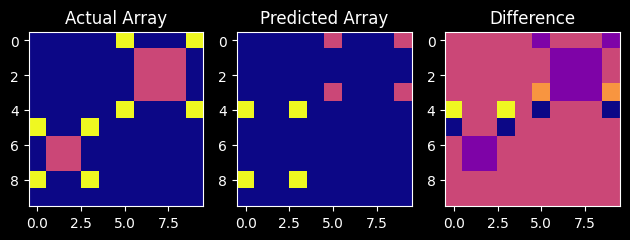

Training:   7%|▋         | 11/150 [14:45<2:52:22, 74.41s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: 042a79cd-efb7-40c7-b366-e55bb2f13a63
Delete of nonexisting embedding ID: 0dada5ee-4524-46c5-92df-e2474030fe61
Delete of nonexisting embedding ID: 9aec3982-ccbb-408b-b821-127c632fccdf
Delete of nonexisting embedding ID: 2a498b88-2684-49d2-b6a9-70d01eb2de02
Delete of nonexisting embedding ID: 7d70281f-77e0-4a81-833b-b3d7b3c51aaa
Delete of nonexisting embedding ID: bb318b7e-69af-4cd9-bbd3-98d708315651
Delete of nonexisting embedding ID: d57b1c29-79e8-460f-948d-03970b3b5a95
Delete of nonexisting embedding ID: de98a8fb-1bc5-4492-9f28-7fdf30ea9c17
Delete of nonexisting embedding ID: affce97a-cde3-4971-94a5-d76b3afc4473
Delete of nonexisting embedding ID: 27d98566-bd30-491e-a82f-97e4a703401b
Delete of nonexisting embedding ID: 4a55b87a-00db-4c4c-8957-7affe72ec3ae
Delete of nonexisting embedding ID: 223909a8-05fe-4bad-8fac-6765044a6517
Delete of nonexisting embedding ID: bf34a54d-ff47-46f4-9eef-48526699f3d3
Delete of nonexisting embedding ID: 0a648113-8bef-4

Pruned 15 old entries and added 5 new entries.

Learned Knowledge Update:
['Understand and apply spatial transformation rules that dictate how integers '
 'should adjust their positions based on surrounding elements, particularly '
 'focusing on barriers like zeros.',
 'Encourage detailed analysis of previous transformation examples to enhance '
 'understanding of how specific integer placements were achieved, particularly '
 'the roles of adjacency and elevation.',
 'Implement a systematic validation process during transformations, ensuring '
 'that placements are compared against expected values and adjustments are '
 'made to rectify discrepancies.',
 'Recognize the importance of maintaining the structure of input grids when '
 'transforming, particularly how the distribution of zeros can influence the '
 "movement of integers like '8' in the grid.",
 'Establish guidelines for interacting integers during transformations to '
 'ensure that movements reflect learned patterns accuratel

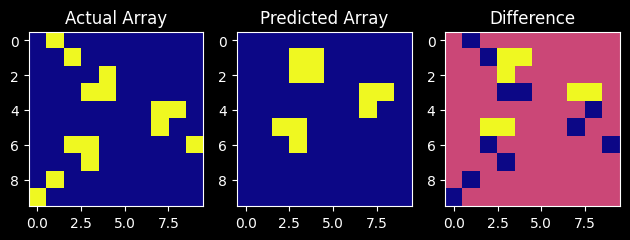

Training:   8%|▊         | 12/150 [16:06<2:55:40, 76.38s/it]

Pruned 15 old entries and added 8 new entries.


Delete of nonexisting embedding ID: 7a2be7db-563d-4445-8035-dacc53f6b928
Delete of nonexisting embedding ID: bab7d0a2-45e7-476a-b26e-cf685719898d
Delete of nonexisting embedding ID: d30766a2-09ed-49d7-aa1b-b5e82c3fe4bf
Delete of nonexisting embedding ID: 9f904549-4208-4cc2-8e81-319808ed9351
Delete of nonexisting embedding ID: 8c51822d-d26e-45fb-8314-f9c1e147f4f4
Delete of nonexisting embedding ID: addff901-8710-49b7-9191-e6117f33e871
Delete of nonexisting embedding ID: c6c17318-6ded-4989-b7a3-581d5f005d70
Delete of nonexisting embedding ID: 7f356a05-9226-4cc1-97a6-8216b3ce1698
Delete of nonexisting embedding ID: 279a4592-b56c-4cb7-b7c9-3a4c793dc1fe
Delete of nonexisting embedding ID: 9f68ee35-0647-462f-924b-1436bf2ca4c9
Delete of nonexisting embedding ID: 6b130f48-6529-4b05-a908-84b4fadbf193
Delete of nonexisting embedding ID: c01775cf-5ccd-4e68-b2d9-d8a6665ffe00
Delete of nonexisting embedding ID: 38bbca69-2ca4-4fa7-bd85-925502d5628b
Delete of nonexisting embedding ID: 70d6e125-af15-4

Pruned 15 old entries and added 5 new entries.

Learned Knowledge Update:
['Integers in grids can dramatically impact the transformation output '
 'depending on their spatial arrangements and adjacent values.',
 'When processing grids where zeroes act as barriers, the placement of '
 "surrounding integers like '1' can dictate the values filled in adjacent "
 'cells, increasing according to proximity to clusters of higher numbers.',
 'Understanding the connection and interaction between adjacent integers '
 'enhances the application of transformation rules, especially when '
 'interpreting complex grids with various barriers.',
 'Patterns observed from previous transformations reveal that numbers '
 'clustered together tend to form regions of influence, impacting neighboring '
 'cells based on numerical adjacency.',
 'Trial-and-error is essential in predicting potential transformations, '
 'offering insights into potential adjustments that can be made to improve '
 'accuracy in future g

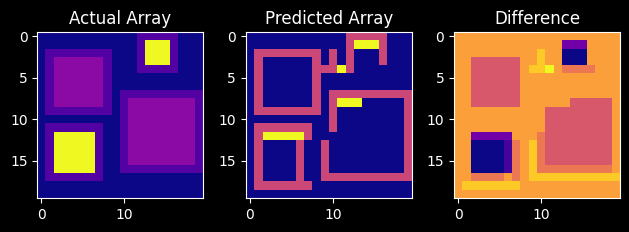

Training:   9%|▊         | 13/150 [17:39<3:05:46, 81.36s/it]

Pruned 15 old entries and added 4 new entries.


Delete of nonexisting embedding ID: 46633f15-91b9-4a4d-bb05-c1afe1a80284
Delete of nonexisting embedding ID: 8031131b-8f21-4cfa-9605-96cf313d7668
Delete of nonexisting embedding ID: 00d0d1a0-f67e-4de1-8ce0-55b5083fe601
Delete of nonexisting embedding ID: 9b9b53db-a9d0-4bde-b950-ee773677e832
Delete of nonexisting embedding ID: b2c86cc4-d0f4-42f3-8656-edbedeb369b8
Delete of nonexisting embedding ID: c1f64074-0148-4eea-8ab3-161a9a4f92ff
Delete of nonexisting embedding ID: ca429514-6b10-4c3b-9ee7-5f41c7501729
Delete of nonexisting embedding ID: 7e9b369a-4c63-42d0-b1bf-f328fe09003c
Delete of nonexisting embedding ID: 19515c93-bf3d-4909-8d1b-b21cb687f136
Delete of nonexisting embedding ID: e5849770-b523-4f1b-8b13-e89e62b9009a
Delete of nonexisting embedding ID: b79c0e14-43b2-4aa9-9cf6-f3ef1144aa2d
Delete of nonexisting embedding ID: e43c0782-c53c-42aa-85fb-4f0f16ce3f4e
Delete of nonexisting embedding ID: 94ed249c-f5f3-496d-a973-67f7d89498bb
Delete of nonexisting embedding ID: be9ebd33-61bf-4

Pruned 15 old entries and added 5 new entries.

Learned Knowledge Update:
['Understanding transformation rules requires identifying spatial '
 'relationships between cells in a grid.',
 'Maintaining dimensional integrity is crucial, so pay close attention to the '
 'structure of input and output grids to ensure that rows and columns align '
 'appropriately.',
 'When transforming grids, zeros can act as barriers. Their presence should be '
 'factored into subsequent placements of integers to ensure accurate '
 'representation of color transitions and clustering.',
 'Identifying consistent patterns from previous examples strengthens future '
 'predictions; thus, one should focus on the underlying logic governing '
 'transformations, rather than merely replicating prior outputs.',
 'Validation checks are necessary to assess the integrity of output '
 'predictions against expected outcomes, looking not only at shapes but also '
 'at the values within the grids.']
DTW Score: 2.8284271247461

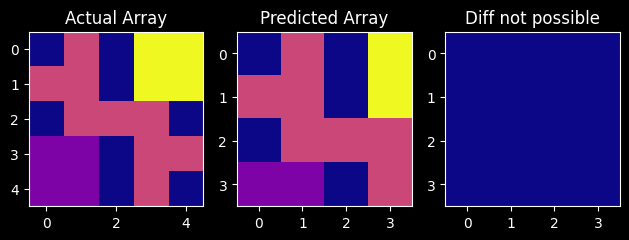

Training:   9%|▉         | 14/150 [18:46<2:54:49, 77.13s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: ad3b62b2-0809-47bc-b5b1-ff593c15cb52
Delete of nonexisting embedding ID: dd70a1ae-386b-4ee0-abbb-836da562f182
Delete of nonexisting embedding ID: afd62a7f-f829-4340-971f-0698ff7bd0b2
Delete of nonexisting embedding ID: 74262189-3f95-4f7a-816a-b0fa4a5b1cf7
Delete of nonexisting embedding ID: ceda1af3-1c3f-4627-8847-e93f478887ce
Delete of nonexisting embedding ID: 5c6a6aaf-fc0c-40a8-b7df-9089380b5bb4
Delete of nonexisting embedding ID: 04bed2ab-ab5e-4de8-b36b-dcdba91a4414
Delete of nonexisting embedding ID: 01d66566-43a3-4c07-a10d-af87a6c744e2
Delete of nonexisting embedding ID: 55509182-a531-484d-afbd-b52fa551e571
Delete of nonexisting embedding ID: 7b0e1826-09c7-41fe-9bda-a57e0ed7616f
Delete of nonexisting embedding ID: 9a4f72c8-61f9-4397-87d7-122b0537b7d6
Delete of nonexisting embedding ID: 937fc943-d1ab-4965-9736-d78a331882e2
Delete of nonexisting embedding ID: ad3b62b2-0809-47bc-b5b1-ff593c15cb52
Delete of nonexisting embedding ID: dd70a1ae-386b-4

Pruned 15 old entries and added 5 new entries.

Learned Knowledge Update:
['Develop a systematic approach to analyze input grid structures, focusing on '
 'the influence of clusters on transformation outcomes. Applicable when '
 'analyzing grid transformation tasks.',
 'Maintain constant height and width of output grids; ensure all relevant '
 'integers are represented in the transformation. Applicable in all grid '
 'output constructions.',
 'Refine methods for predicting the spatial behavior and impact of zeros in '
 'the transformation process, acknowledging their role as barriers. Useful '
 'during transformations involving grids with zeros and neighboring integers.',
 'Understand the relationship between clustered integers and their arrangement '
 'in output; account for how these affect neighboring cells. Crucial in '
 'achieving accurate transformations across various grid tasks.',
 'Enhance abilities to recognize patterns from previous transformations to '
 'inform future outpu

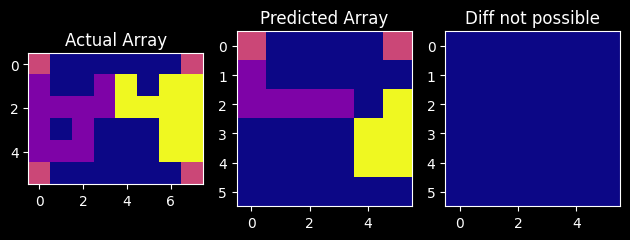

Training:  10%|█         | 15/150 [19:53<2:46:26, 73.97s/it]

Pruned 15 old entries and added 6 new entries.


Delete of nonexisting embedding ID: 6108bbdb-9498-4f5c-94f3-7c50af1fe02b
Delete of nonexisting embedding ID: b269d9f9-0a25-428f-86b0-03dd069c801a
Delete of nonexisting embedding ID: f0accae2-bfd6-44aa-8e0e-31d5d2c4e31a
Delete of nonexisting embedding ID: d0554d05-04d3-4c75-83d7-04452cd30645
Delete of nonexisting embedding ID: 9d1a9b3d-53e1-4a74-85ea-20f8bcfa30e6
Delete of nonexisting embedding ID: 81268682-f66f-40e7-b2b8-054af7a4d2a1
Delete of nonexisting embedding ID: f603059e-9734-4a82-b71d-3cdadcc2ba9e
Delete of nonexisting embedding ID: f21f93b1-6377-4f8b-bf97-3446f5bbe267
Delete of nonexisting embedding ID: d36dd1b9-aca2-4363-90ee-5acd8dd26683
Delete of nonexisting embedding ID: e7226c43-6135-4174-ba71-84f27bae0e1e
Delete of nonexisting embedding ID: 009f9d61-2e3a-46a9-8a03-c03a028d771f
Delete of nonexisting embedding ID: bc96eb0b-29b9-4d75-8ab7-b4ed061df873
Delete of nonexisting embedding ID: 910472ff-34db-4218-af01-26e4272c2bad
Delete of nonexisting embedding ID: 539d5b59-fb66-4

Pruned 15 old entries and added 3 new entries.

Learned Knowledge Update:
['Understanding that zeros in a grid represent boundaries and can influence '
 'neighboring integers during transformations.',
 'Recognizing clusters of adjacent integers in a grid are crucial for '
 'determining the values of adjacent output cells.',
 'Identifying the importance of structural continuity in the output grid, '
 'which should reflect the patterns established in the input grids.',
 'Employing a comparative analysis between expected outputs and generated '
 'outputs to clarify discrepancies and enhance consistency',
 'Reinforcing the need for iterative learning from previous examples to '
 'accurately predict outputs for new inputs, especially focusing on zero '
 'behavior and integer clusters.']
DTW Score: 6.48074069840786


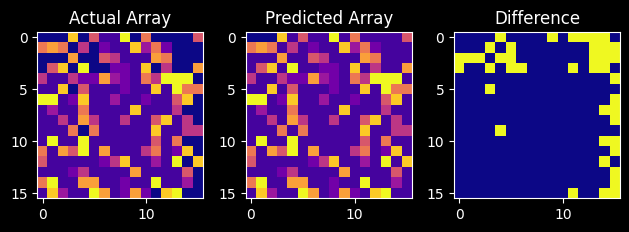

Training:  11%|█         | 16/150 [21:02<2:42:20, 72.69s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: 5f71305c-9425-4a7a-a519-cb305d35be48
Delete of nonexisting embedding ID: fa9f6f44-1dec-4479-b4a8-fb338cbf8500
Delete of nonexisting embedding ID: d353af3b-e367-4bbe-9a3f-0b25f706080b
Delete of nonexisting embedding ID: b2aaaa3d-8f98-4190-b6b1-56e404256212
Delete of nonexisting embedding ID: a1f84596-dc32-456b-8f3a-78ab369670d8
Delete of nonexisting embedding ID: ac344136-0ab2-4d5f-ae3b-2c98c28c6345
Delete of nonexisting embedding ID: f8a56ce2-7a2a-408b-825e-076f8920ac33
Delete of nonexisting embedding ID: 3281b344-43b7-4412-9ae6-52e5d6641aef
Delete of nonexisting embedding ID: ec15c466-28d8-404c-955a-6ac73bfea2e9
Delete of nonexisting embedding ID: 101d6069-47d9-4dc8-804d-cdf98b05f4f2
Delete of nonexisting embedding ID: e87283d9-5616-4a20-9790-e249605259c2
Delete of nonexisting embedding ID: 2bea9e4d-f454-4a38-aa59-365a901ed3e9
Delete of nonexisting embedding ID: dfbbcdcd-e56f-4ee4-addf-74ebf730a6b5
Delete of nonexisting embedding ID: 5f71305c-9425-4

Pruned 15 old entries and added 4 new entries.

Learned Knowledge Update:
['Understanding the relationship between zeros in an input grid and their '
 'impact on the aggregation of non-zero integers is crucial; zeros can act as '
 'separators, influencing how clusters of numbers are represented in the '
 'output.',
 'When determining the dimensions of the output grid, it is important to '
 'account for the total quantity of non-zero integers present in the input '
 'grid, ensuring that the output accurately reflects all necessary elements '
 'and their frequency.',
 'Conducting cross-analysis with a diverse array of transformation examples '
 'enhances comprehension of transformation rules; this helps solidify the '
 'understanding of how to aggregate and denote numbers in output grids '
 'accurately.',
 'A systematic verification process against expected outcomes during '
 'transformations can significantly improve the accuracy of predicted outputs, '
 'ensuring that numerical density

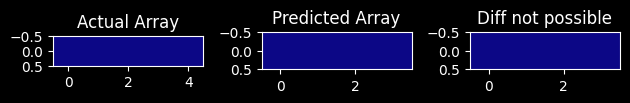

Training:  11%|█▏        | 17/150 [22:15<2:40:59, 72.62s/it]

Pruned 15 old entries and added 6 new entries.


Delete of nonexisting embedding ID: b0f73bb0-1ad2-42e5-9e1f-355d48cb1ad1
Delete of nonexisting embedding ID: 0fe22167-ab44-471c-9cc8-e911fd979df3
Delete of nonexisting embedding ID: 95ec1cfa-c768-4d57-adac-d5635679e671
Delete of nonexisting embedding ID: f4cf50a0-142b-4974-876c-804146d757fc
Delete of nonexisting embedding ID: 08e16bc3-017a-40c8-b803-a3f9edcdef2b
Delete of nonexisting embedding ID: 728b2f5f-19a8-4d04-bb9d-ff855ea3fb81
Delete of nonexisting embedding ID: 17f0b203-c085-4d10-9d80-04e0168178ed
Delete of nonexisting embedding ID: b95f3aee-adc0-4075-9620-cf6eb5f72cc5
Delete of nonexisting embedding ID: e79ed8bb-3a11-4682-8c60-d56ba89f6222
Delete of nonexisting embedding ID: 164ed71f-3576-4af3-8aac-625cc9463246
Delete of nonexisting embedding ID: f5d8c2e0-61d1-4b37-89a8-460d4b368e9c
Delete of nonexisting embedding ID: 9bb36e75-0a74-42f5-a856-c6bee2c4f749
Delete of nonexisting embedding ID: d586e8fd-b627-4100-a268-707e08b8eb16
Delete of nonexisting embedding ID: b0f73bb0-1ad2-4

Pruned 15 old entries and added 5 new entries.

Learned Knowledge Update:
['Understanding transformation rules can greatly influence the predicted '
 'output; close observation of provided examples is crucial for improving '
 'accuracy.',
 'The output grid should accurately mirror the dimensions and non-zero density '
 'of the input grid, ensuring that size and central distribution reflect the '
 'input properties.',
 'Zeros play a critical role in shaping clustering behavior; they can act as '
 'barriers and should be analyzed for their impact on surrounding integers to '
 'maintain accurate output transformation.',
 'Non-zero integers should be clustered according to proximity rules, which '
 'should be deduced from patterns in the provided transformation examples.',
 'Recognizing the importance of overall grid structure and density in '
 'predicting outputs improves the accuracy of transformations and results.',
 'Exploration and application of spatial relationships in the input gri

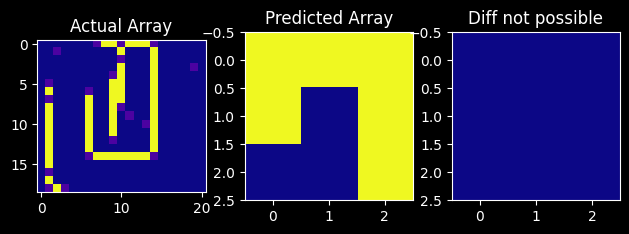

Training:  12%|█▏        | 18/150 [23:46<2:52:00, 78.19s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: c1c7fbc6-6e04-4237-9c04-28dd29d8467f
Delete of nonexisting embedding ID: f11c7e55-d33a-4d24-aa9f-22fe93bff6c9
Delete of nonexisting embedding ID: ab683c4f-45eb-4795-9ba7-cb4e1881601b
Delete of nonexisting embedding ID: f9e8194a-00b7-4400-8489-737aa9200bab
Delete of nonexisting embedding ID: 1771c516-7ecc-451b-aebb-31166377ca19
Delete of nonexisting embedding ID: d2304d7b-28e3-4ea1-9a6c-19696683d680
Delete of nonexisting embedding ID: f1362d83-e0b1-49f4-b8a0-86ebf9760ae4
Delete of nonexisting embedding ID: 5af3fc40-86cc-4335-ab6d-71805fd536cd
Delete of nonexisting embedding ID: ab8e397f-3bab-4b04-bb00-8e03021a28cc
Delete of nonexisting embedding ID: 6b36f967-22d1-4043-9b3e-460fc94f371a
Delete of nonexisting embedding ID: e273f478-dd9e-4714-b95a-97b4d575214f
Delete of nonexisting embedding ID: df1cbb39-359c-41f9-a0c2-9250cbca5197
Delete of nonexisting embedding ID: 5ddfc3a1-5fd2-4b82-9851-22bcf7459ba2
Delete of nonexisting embedding ID: a941458e-a22a-4

Pruned 15 old entries and added 3 new entries.

Learned Knowledge Update:
['Understanding the role of zero as both a separator and significant component '
 'is crucial for properly interpreting grid transformations.',
 'The height of the output grid must match the expected structure defined by '
 'the input grid, reinforcing the need for careful analysis of dimensions '
 'during task execution.',
 'Establish a methodical approach for verifying output grid dimensions and '
 'content – this ensures accuracy and reduces errors in representation.',
 'When interpreting grids, it’s important to note spatial relationships of '
 'integers, particularly how they group together vertically or horizontally, '
 'as this can impact output transformation.',
 'Reinforcement of patterns from training examples can guide accurate '
 'transformation logic, encouraging a thorough retrospective examination of '
 'provided examples before drawing conclusions.']
DTW Score: 8.48528137423857


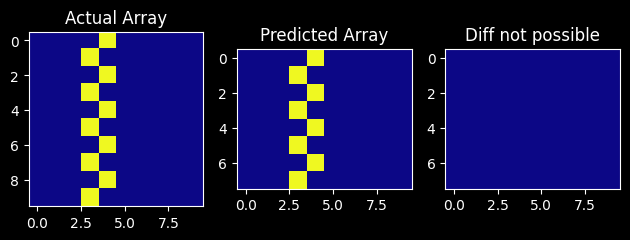

Training:  13%|█▎        | 19/150 [24:49<2:41:01, 73.75s/it]

Pruned 15 old entries and added 6 new entries.


Delete of nonexisting embedding ID: 2a3899f8-2cd7-447f-894b-08443af537c5
Delete of nonexisting embedding ID: 9025e718-8318-407c-be2b-b1397643c7e9
Delete of nonexisting embedding ID: e2f5a87b-9f5c-4c79-b930-565c80fae909
Delete of nonexisting embedding ID: ca66a2ac-b280-4427-bacc-87c6af4862dd
Delete of nonexisting embedding ID: 82136c5f-8d0b-4a68-b55d-640da5779316
Delete of nonexisting embedding ID: e3c0bb01-cb24-4ce8-b64f-4e8cab4fe8be
Delete of nonexisting embedding ID: cd967a1f-cd49-4af3-bfc7-79df7b23526c
Delete of nonexisting embedding ID: 6e886176-e7b5-45bc-85ed-d7279744b57b
Delete of nonexisting embedding ID: e1cc57a6-6e8d-464e-b073-cbfeec16e39a
Delete of nonexisting embedding ID: 6dc7920a-0654-4a73-a57c-fd070e951298
Delete of nonexisting embedding ID: 050c4f69-9e6c-487a-8e42-91ade3a31f86
Delete of nonexisting embedding ID: 2367fee7-966e-4c59-9172-186dc0ec89e3
Delete of nonexisting embedding ID: 5a8ab893-4afe-41b9-9339-b42dcf034f04
Delete of nonexisting embedding ID: 7797267b-cee5-4

Pruned 15 old entries and added 3 new entries.

Learned Knowledge Update:
['Understanding the role of zeros as critical separators in spatial '
 'transformations is essential for maintaining cluster integrity in output '
 'grids.',
 'Implementing a systematic approach for determining the dimensions of output '
 'grids based on observed patterns in input grids can improve task '
 'performance.',
 'Emphasizing the importance of spatial relationships in transformation logic '
 'aids in producing accurate output grids.',
 'Conducting detailed error analysis after each transformation trial can help '
 'in refining processes and adherence to transformation rules.',
 'Recognizing how proximity rules influence the placement of integers and '
 'zeros in output grids can enhance accuracy in grid representation.']
DTW Score: 0.0


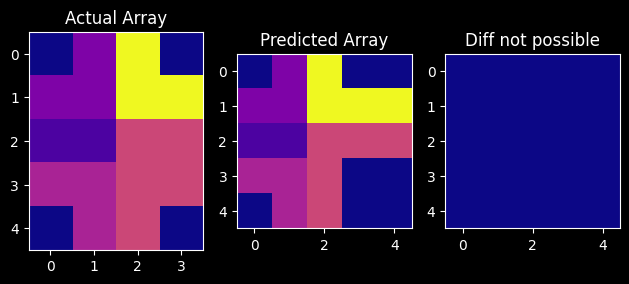

Training:  13%|█▎        | 20/150 [26:14<2:46:38, 76.91s/it]

Pruned 15 old entries and added 7 new entries.


Delete of nonexisting embedding ID: b41531b1-3f30-4d0b-b87b-ef6a3fa1afb2
Delete of nonexisting embedding ID: 1166bdf1-2b6e-4198-878c-2489bfad66ce
Delete of nonexisting embedding ID: cefbb7b7-bc6a-46d7-b93b-5452cadcfa76
Delete of nonexisting embedding ID: 846f5b53-ef68-4b68-9134-35eb16318b60
Delete of nonexisting embedding ID: 73c2160f-ae00-47f2-86e7-7cbe78533e69
Delete of nonexisting embedding ID: 88bfa413-3f7b-4670-bd41-88cb6c7081cd
Delete of nonexisting embedding ID: 87cafa8b-13bb-4dd4-b58c-bcbff1338a3b
Delete of nonexisting embedding ID: d1af4415-2e8a-4fc7-bbef-1d9c262783b7
Delete of nonexisting embedding ID: c9c97332-6c88-4bfc-834a-1ca1d96bffac
Delete of nonexisting embedding ID: 3dc48ca4-3471-48b7-9fac-c0fef9fa1bf9
Delete of nonexisting embedding ID: d28018ea-5869-4398-8e40-faba1d859d30
Delete of nonexisting embedding ID: c9c08fec-9795-4d03-9187-493ba4f7b868
Delete of nonexisting embedding ID: 462dc0fd-74de-4f4b-95e5-bc18fa8b5b63
Delete of nonexisting embedding ID: 96e9759a-3123-4

Pruned 15 old entries and added 4 new entries.

Learned Knowledge Update:
['Understanding the critical role of zeros as boundaries and separators in '
 'grid transformations is essential for accurately predicting output grids '
 'from input grids. These zeros define clusters of non-zero integers and their '
 'relationships to one another. Applicability: When analyzing matrices with '
 'empty spaces or boundaries.',
 'Continuous comparative analysis between processed outputs and expected aimed '
 'outputs allows for iterative refinement of transformation rules. This '
 'practice helps identify deviation patterns and enhances the understanding of '
 'how to structure outputs based on specific rules. Applicability: During the '
 'development of transformations for similar grids.',
 'A systematic approach to reviewing previous examples is vital; focusing on '
 'the specific spatial arrangements of integers in relation to zeros reveals '
 'important patterns that inform future transformatio

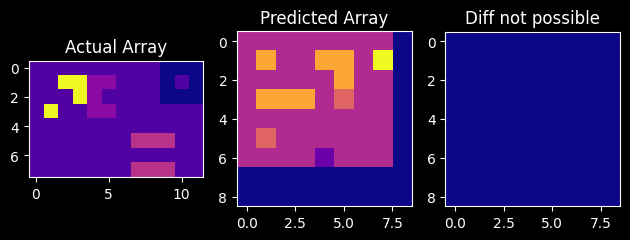

Training:  14%|█▍        | 21/150 [27:30<2:45:04, 76.78s/it]

Pruned 15 old entries and added 6 new entries.


Delete of nonexisting embedding ID: b2de7763-886b-429d-8a12-c7fbb4683c66
Delete of nonexisting embedding ID: 3588f960-e461-4e12-80f2-eb8336396c25
Delete of nonexisting embedding ID: 526b4997-f19c-4e36-a2f3-d23af436d565
Delete of nonexisting embedding ID: 0ece7dc8-c252-4d5e-8168-0cc2a6f960f2
Delete of nonexisting embedding ID: 49a21b33-215f-4ff4-ac37-e046c282c102
Delete of nonexisting embedding ID: 780570f1-c39f-42fd-b18a-f8304735a9ef
Delete of nonexisting embedding ID: 764d6d46-63ee-42dc-9d2e-a0ad60978755
Delete of nonexisting embedding ID: b0019344-16c1-41bd-8406-90381fb17774
Delete of nonexisting embedding ID: 44936b8a-d4af-4a70-8fad-ef3c2cc432cf
Delete of nonexisting embedding ID: 3d671fbb-4a5e-4425-a6d6-ff59500e3338
Delete of nonexisting embedding ID: 9c4dc8c3-8ebb-45be-8140-6a802b6bd62c
Delete of nonexisting embedding ID: 298b2a2b-72ed-4c36-8526-0d2b90459eb2
Delete of nonexisting embedding ID: 3a422ed4-db4b-4793-8011-619ea445b1b9
Delete of nonexisting embedding ID: f159cea6-5924-4

Pruned 15 old entries and added 6 new entries.

Learned Knowledge Update:
['The presence of zeros in a grid acts as a critical boundary, influencing the '
 'spatial relationships of adjacent non-zero integers.',
 'Transformations of a grid must consider the structural integrity and '
 'relative positioning of non-zero elements while respecting the influence of '
 'zeros.',
 'The accurate transformation of an input grid requires careful analysis of '
 'input patterns, particularly how integer clusters relate to surrounding '
 'zeros.',
 'Patterns observed in previous transformations should be meticulously '
 'analyzed and consistently applied to ensure valid outputs for new inputs.',
 'Non-zero integers in the output often correspond closely to their input '
 'while respecting zero boundaries, indicating the importance of analyzing '
 'adjacency and proximity in transformation logic.']
DTW Score: 8.426149773176359


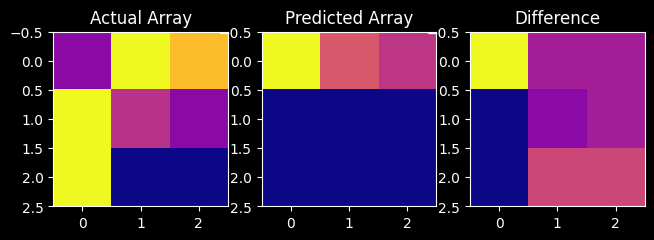

Training:  15%|█▍        | 22/150 [28:40<2:39:12, 74.63s/it]

Pruned 15 old entries and added 7 new entries.


Delete of nonexisting embedding ID: 774dfb9c-d65c-40f3-9b5d-e75c49df171d
Delete of nonexisting embedding ID: 8199aa0c-f079-49a2-8722-75c3fa4538b5
Delete of nonexisting embedding ID: 0cb6be99-9655-43ea-aba1-104e8004dcec
Delete of nonexisting embedding ID: d14d6b3c-e794-4ffb-be11-e8fc8829110f
Delete of nonexisting embedding ID: 80923702-febb-4996-a808-7376b4def965
Delete of nonexisting embedding ID: ece18cdc-d6a6-4354-aebd-c380b99f5793
Delete of nonexisting embedding ID: ca91c3bd-daf8-4cea-93ea-de03881378eb
Delete of nonexisting embedding ID: 0a939ea2-618b-4400-8d93-014fbbf91cc9
Delete of nonexisting embedding ID: 7789ffb1-03f9-4819-880e-f179c7585a74
Delete of nonexisting embedding ID: 8b356549-4e05-4a04-8169-0fcb7ab2ca24
Delete of nonexisting embedding ID: 080c3a71-c661-4673-a450-8c6f011204da
Delete of nonexisting embedding ID: de7236e0-3abe-4474-80aa-ef28946ab0f8
Delete of nonexisting embedding ID: 167f0065-186c-42fa-9605-ea12ffe3a057
Delete of nonexisting embedding ID: 5a125a7e-95bb-4

Pruned 15 old entries and added 2 new entries.

Learned Knowledge Update:
['Understanding the role of zeros as boundaries is crucial for interpreting '
 'spatial relationships in grid transformations. Applicability: Enhancing '
 'algorithms for image processing tasks where boundaries impact output '
 'representations.',
 'Clusters of integers should be analyzed in relation to neighboring zeros to '
 'predict transformations accurately. Applicability: This principle can be '
 'adapted to various machine learning models focusing on spatial data '
 'interpretations.',
 'Conducting a post-response analysis is essential for identifying overlooked '
 'rules in transformation processes. Applicability: Useful in iterative '
 'testing environments to refine algorithms based on output discrepancies.',
 'Integers adjacent to boundaries undergo distinct transformations that differ '
 'from those isolated in the grid. Applicability: This understanding is '
 'applicable in the design of computationa

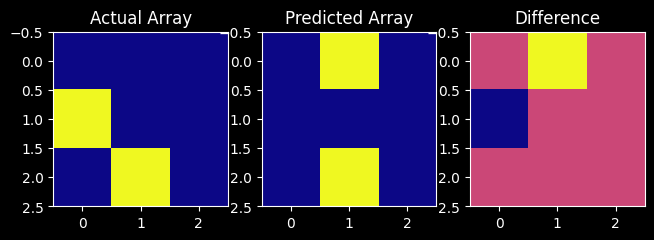

Training:  15%|█▌        | 23/150 [29:44<2:31:33, 71.60s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: a57e2306-d5a9-4251-b82b-1ade8dc5b8fb
Delete of nonexisting embedding ID: ec5b300f-0b3a-46f1-9ff4-cf1ce5d51208
Delete of nonexisting embedding ID: a25202ed-32e9-4b72-8e45-fb0cf5076bd3
Delete of nonexisting embedding ID: 02763a25-95ae-4cba-aa89-12433484a2ed
Delete of nonexisting embedding ID: 1ae16d4a-a600-4ca3-b2c0-c36f33026e24
Delete of nonexisting embedding ID: 8ce11ec0-33ff-4f5f-af31-9b1c2bca60da
Delete of nonexisting embedding ID: a2f292b2-513e-48af-a126-ecfde20c070c
Delete of nonexisting embedding ID: da4101de-189f-45b2-bec1-2fdad7dbb292
Delete of nonexisting embedding ID: 0e59ca50-09a1-401d-9011-14e9ed3bae9f
Delete of nonexisting embedding ID: 9decd06b-8ceb-47e0-9e4a-bdc6adb0995f
Delete of nonexisting embedding ID: d77c67b5-e7e7-4995-a601-47ecbf6bfae0
Delete of nonexisting embedding ID: c7f3f08e-33a1-48ac-8310-e6f1571034e6
Delete of nonexisting embedding ID: e72637ef-f697-45dd-9fa9-9dddbe592146
Delete of nonexisting embedding ID: 12a53512-1741-4

Pruned 15 old entries and added 4 new entries.

Learned Knowledge Update:
['Transformation consistency is essential: Each transformation must maintain '
 'consistent logic across examples, ensuring similar patterns are treated '
 'similarly.',
 'Zeros play a critical role in transformations: Zeros help define boundaries '
 'and influence the placements of neighboring integers during transformations.',
 'Periodic patterns in transformations should be identified: Recognizing how '
 'integers cluster and how often they repeat can simplify the construction of '
 'new outputs.',
 'The proximity of integers to zeros can significantly alter their '
 'transformation: Understanding how distance and spatial arrangement affect '
 'value changes is key to accurate output construction.',
 'Iterative verification against established transformation rules is '
 'necessary: Before finalizing outputs, compare them systematically against '
 'existing rules derived from previous examples.']
DTW Score: 7.6

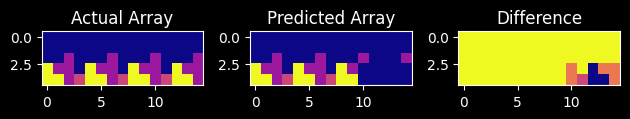

Training:  16%|█▌        | 24/150 [30:55<2:29:44, 71.30s/it]

Pruned 15 old entries and added 6 new entries.


Delete of nonexisting embedding ID: 260a3803-57f7-45d5-b886-5a9eb1a55141
Delete of nonexisting embedding ID: 433fcac7-632b-4600-beab-80d83a2ccb23
Delete of nonexisting embedding ID: 5842e71b-a968-4bc4-9412-8cfd5b209fd7
Delete of nonexisting embedding ID: 11435ac7-8df9-414d-b807-28ac6ce3ef5b
Delete of nonexisting embedding ID: d5c038ad-1432-4e2b-a405-35b0aaae80a3
Delete of nonexisting embedding ID: dff2bc2c-526c-4213-af05-959fbf13f085
Delete of nonexisting embedding ID: af33fe6b-4a9d-4f5b-b5a2-ae0a4f0b0743
Delete of nonexisting embedding ID: 454bbcb4-0309-4995-a1a2-d2d4eb3f8477
Delete of nonexisting embedding ID: afa8fdf4-10bf-4d52-9f35-b7bf48406915
Delete of nonexisting embedding ID: a91a8a18-849a-4bf2-873b-207cd308f9e6
Delete of nonexisting embedding ID: 138c895f-85ad-4482-8848-a1831fac4af6
Delete of nonexisting embedding ID: 1cb6f090-f2ca-414a-ba4f-f1d0fa5594f2
Delete of nonexisting embedding ID: eb28274a-1f97-43d6-9300-0d17a8f10447
Delete of nonexisting embedding ID: 7811a31c-f02f-4

Pruned 15 old entries and added 5 new entries.

Learned Knowledge Update:
['Understanding that zeros serve as boundaries affecting the transformation of '
 'neighboring integers underlines the importance of boundary awareness in '
 'image processing tasks.',
 'The arbitrary replacement of numbers in transformation must be founded on '
 "established patterns, as seen with '1' transforming to '3', to ensure "
 'accurate and meaningful transformations.',
 'Analyzing historical examples to ascertain spatial relationships and the '
 'interactions of integers within a grid can enhance future transformation '
 'predictions.',
 'Utilizing matrix visualization tools aids in comprehending spatial '
 'relationships and boundaries, promoting better intuition for transformations '
 'in grid-based tasks.',
 'Incorporating a validation step after processing transformations can help '
 'identify inconsistencies between the output and expected results based on '
 'prior examples.']
DTW Score: 8.5440037

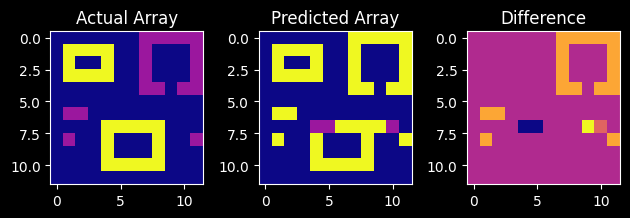

Training:  17%|█▋        | 25/150 [32:10<2:30:49, 72.39s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: fdaa42aa-c79c-477f-b0b1-c08ee638344a
Delete of nonexisting embedding ID: ae6a1e3c-0f46-4466-bba3-fd3841fe3e7d
Delete of nonexisting embedding ID: 101ff3a9-cc6e-4c45-a27b-596553eea726
Delete of nonexisting embedding ID: 4cf4da3c-9a66-4b70-8955-e654dd67e721
Delete of nonexisting embedding ID: dc85cfaa-c90b-4df4-b7eb-5212dfd054d4
Delete of nonexisting embedding ID: 26b52f57-cf45-4f2a-9d83-a70dbe764f0d
Delete of nonexisting embedding ID: 7956325d-3b8f-4b48-bd8f-b3680ccab000
Delete of nonexisting embedding ID: 40c4626c-4452-4ca7-a297-e8fa61430590
Delete of nonexisting embedding ID: ba7ce695-6ab9-417e-984b-24283174f2f2
Delete of nonexisting embedding ID: 72b89a10-2905-4bf6-979f-9ac224cb9bd3
Delete of nonexisting embedding ID: 04b94715-6db3-4fee-88ce-4cf40f15a582
Delete of nonexisting embedding ID: d04ecc9a-8eea-4635-8cbf-f306b7b2c9b6
Delete of nonexisting embedding ID: e795b4a1-b9d7-4c32-a1df-895752e0fec7
Delete of nonexisting embedding ID: f685b2a7-19cb-4

Pruned 15 old entries and added 4 new entries.

Learned Knowledge Update:
['Transformation rules in grid structures are influenced by non-zero integer '
 'placements and their surrounding zeros.',
 'Maintaining spatial relationships in grid transformations is crucial for '
 'producing correct outputs, particularly how non-zero integers impact their '
 'adjacent spaces.',
 'A systematic approach to validate transformation steps against known '
 'examples can help in identifying errors prior to finalizing outputs.',
 'Grasping the significance of boundary conditions is essential, especially '
 'how they dictate inner cell transformations and arrangements in output '
 'grids.',
 'Understanding the effects of zeros in the input grid can clarify how '
 'adjacent integers should be placed, preserving the intended visual '
 'representation.',
 'Reinforcing pattern recognition through thorough analysis of prior examples '
 'enhances the ability to translate input configurations into output '
 

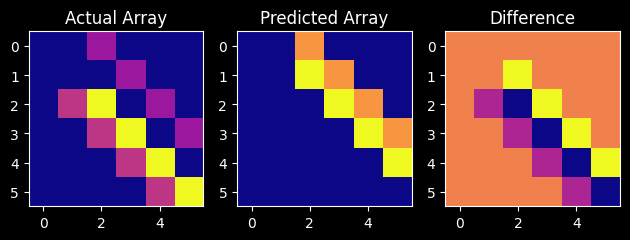

Training:  17%|█▋        | 26/150 [33:25<2:31:37, 73.37s/it]

Pruned 15 old entries and added 7 new entries.


Delete of nonexisting embedding ID: a7c22773-966c-4574-87ea-f4c1ba504e28
Delete of nonexisting embedding ID: d972ee43-667b-416c-bba5-22e7bd5dccd6
Delete of nonexisting embedding ID: a70edf5d-61e9-4028-8640-f39dac724a10
Delete of nonexisting embedding ID: 59685409-5022-49f5-a6e0-64bf9336e8ce
Delete of nonexisting embedding ID: 1868ad4d-94cf-4848-809a-ba76d721aa08
Delete of nonexisting embedding ID: 67d74e07-d884-4f04-9ee0-a66f3900e0a8
Delete of nonexisting embedding ID: bc0f097c-8c0e-4c20-b4d9-1f1707565fb5
Delete of nonexisting embedding ID: 81574b4c-52f6-463d-9791-17b62c4e3dfc
Delete of nonexisting embedding ID: ee3ec294-74d8-4390-bacd-9bed910e5e73
Delete of nonexisting embedding ID: f53957ac-308d-465b-8e19-09a073596f25
Delete of nonexisting embedding ID: 7a72512d-f4a1-4649-a2c1-cdf9ca86bf1b
Delete of nonexisting embedding ID: ff26a8ff-40c6-4959-889b-f2b2c314fdac
Delete of nonexisting embedding ID: 5128ce48-8608-40a9-b2f9-25e860bb128f
Delete of nonexisting embedding ID: a7c22773-966c-4

Pruned 15 old entries and added 5 new entries.

Learned Knowledge Update:
['Understanding that zeros in the grid act as boundaries, limiting the '
 'influence of neighboring integers on transformations, is critical for '
 'accurate output generation.',
 'Establishing rules about how non-zero integers cluster and interact within '
 "the grid will improve the output's alignment with expected results.",
 'Iterative testing with various examples can reinforce understanding of '
 'transformation rules and patterns, leading to more reliable output.',
 'Maintaining spatial integrity when transforming grids is essential; the '
 'relative positions of non-zero integers must align with previous examples to '
 'ensure consistency.',
 'Using a systematic approach to identify and document the effects of specific '
 'integers on those around them can aid in recognizing broader transformation '
 'patterns.']
DTW Score: 10.63014581273465


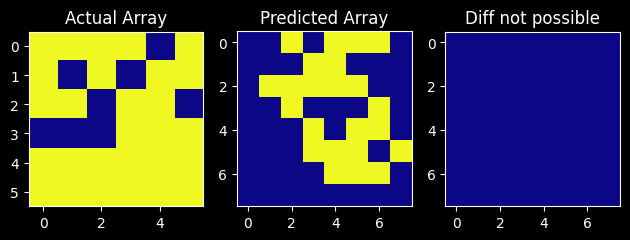

Training:  18%|█▊        | 27/150 [34:59<2:42:43, 79.38s/it]

Pruned 15 old entries and added 10 new entries.


Delete of nonexisting embedding ID: b453bdbc-754f-4e28-9a36-819a800c0b84
Delete of nonexisting embedding ID: b4bf8034-0338-49f6-b2c2-7bc6845f2726
Delete of nonexisting embedding ID: e9f81e02-44d2-488c-aad1-039bce10f5b4
Delete of nonexisting embedding ID: f3790819-fb8c-4888-89cf-d0928e032209
Delete of nonexisting embedding ID: ea0129a8-618c-4194-a148-aa1905f2737f
Delete of nonexisting embedding ID: c2763e4c-ee4a-4b8f-b033-a396f05b020c
Delete of nonexisting embedding ID: ae6909eb-638c-4e13-955c-75ac0f25b214
Delete of nonexisting embedding ID: 18b7e725-5aca-49c5-8bc7-0223a4885757
Delete of nonexisting embedding ID: 413b457b-a14e-4b59-bc81-9e395d4f1816
Delete of nonexisting embedding ID: 405bb905-bc43-492b-a170-e9e7633181cc
Delete of nonexisting embedding ID: f671acdd-1191-47a6-a820-9f6a559f343a
Delete of nonexisting embedding ID: 58967ec5-2691-4d1e-955f-535ea7a58ee6
Delete of nonexisting embedding ID: ff75c2c8-f982-4d59-a4bc-ba6a929f9d7a
Delete of nonexisting embedding ID: 6c5fb388-a421-4

Pruned 15 old entries and added 4 new entries.

Learned Knowledge Update:
['Understanding the role of zero in defining boundaries: In image matrices, '
 'zeros often act as spatial boundaries that influence the placement and '
 'transformation of non-zero integers. This principle can be applied whenever '
 'analyzing transformations in grids with similar structures.',
 'Importance of adjacent relations in transformations: Non-zero integers are '
 'influenced by nearby integers, especially in the context of spatial '
 'transformations. Recognizing these relationships can improve the accuracy of '
 'predictions in future tasks.',
 'Iterative testing for refinement: Continuously refining transformation '
 'outputs based on previous results allows for an organic learning process, '
 "improving the agent's responsiveness to spatial characteristics in matrices.",
 'Cluster recognition: Effectively distinguishing between clusters of integers '
 'can significantly enhance the understanding of 

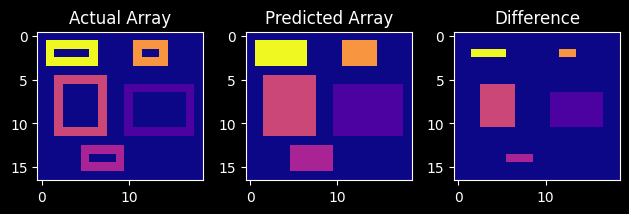

Training:  19%|█▊        | 28/150 [36:32<2:50:04, 83.64s/it]

Pruned 15 old entries and added 7 new entries.


Delete of nonexisting embedding ID: 932207b6-8018-4417-8b3e-4e172feb10c7
Delete of nonexisting embedding ID: 36abd03c-be84-4f91-aa7d-1027249a540d
Delete of nonexisting embedding ID: 141aef77-2188-4681-8e66-66f250ff406a
Delete of nonexisting embedding ID: 7434bbbc-83fb-4313-a987-650ee6dc6b56
Delete of nonexisting embedding ID: a2f9d043-9f6d-4084-8c09-4eb4a9c3c73e
Delete of nonexisting embedding ID: 3b51aff3-b6df-493a-8662-6e9f4b9ec0ad
Delete of nonexisting embedding ID: 12244b8a-cc69-44e1-ba28-fd543d8197fe
Delete of nonexisting embedding ID: 14869c62-ff43-48d7-8f82-8de295489ce8
Delete of nonexisting embedding ID: d668a918-06e7-4316-b5ee-59d137059990
Delete of nonexisting embedding ID: 637af1af-7e34-458c-9f3d-dddc4e8dd70e
Delete of nonexisting embedding ID: 10cc56e2-02a6-464a-b9d5-eec447d9e041
Delete of nonexisting embedding ID: 468a1be3-1bc3-4382-a1d3-8adc17fdc51f
Delete of nonexisting embedding ID: 932207b6-8018-4417-8b3e-4e172feb10c7
Delete of nonexisting embedding ID: 36abd03c-be84-4

Pruned 15 old entries and added 4 new entries.

Learned Knowledge Update:
['Clusters of non-zero integers surrounded by zeros act as critical boundaries '
 'in determining transformations.',
 'It is essential to maintain the spatial integrity of non-zero integer '
 'clusters while constructing the output grid.',
 'Incorporate multiple examples of diverse configurations in training data to '
 'enhance understanding of transformation rules.',
 'Establish a feedback mechanism for continuous learning from previous '
 'mistakes and outputs to improve accuracy.',
 'Understanding how zeros function as boundaries can influence the '
 'transformations of nearby integers.',
 'Recognition of spatial relationships among integers is crucial for accurate '
 'transformation outcomes.',
 'A systematic approach to analyzing input patterns is necessary to derive '
 'transformation logic effectively. ']
DTW Score: 6.6332495807108


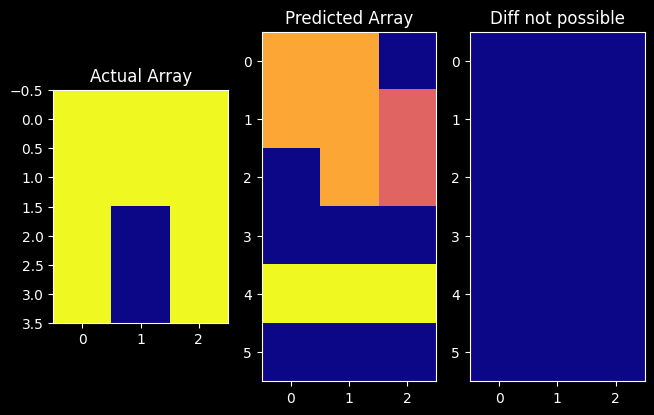

Training:  19%|█▉        | 29/150 [37:55<2:48:08, 83.37s/it]

Pruned 15 old entries and added 9 new entries.


Delete of nonexisting embedding ID: 2c24a201-b685-400c-9909-7df1e92d16b9
Delete of nonexisting embedding ID: 4882c700-a929-4afc-9e70-0726a98adf44
Delete of nonexisting embedding ID: 18a86c5d-d263-4433-8b15-21b26182cc3c
Delete of nonexisting embedding ID: 7f6457fc-33ac-4420-8505-df816a4edb6e
Delete of nonexisting embedding ID: c431803f-75f1-400e-8d82-298d8c3dee6f
Delete of nonexisting embedding ID: d2daeade-5de3-4bb1-94d0-caf6017c8005
Delete of nonexisting embedding ID: 146dc544-6101-4c76-b0a6-47c8cf80c8c1
Delete of nonexisting embedding ID: ecf8a139-99d8-4697-80a1-64d5d9a5ba8f
Delete of nonexisting embedding ID: adce0f9a-fca8-4ae8-9905-ab973aba2c97
Delete of nonexisting embedding ID: 801f7daa-80b3-4978-81ee-0f2ecde1d160
Delete of nonexisting embedding ID: 2a2d769e-a12a-4c90-812c-91948bcf7c1e
Delete of nonexisting embedding ID: e20030da-92e0-4541-bfc0-c5f3ea2048b4
Delete of nonexisting embedding ID: 600b5d08-1aa5-4280-aba2-8a7fd8e8a755
Delete of nonexisting embedding ID: 0181896e-5b18-4

Pruned 15 old entries and added 4 new entries.

Learned Knowledge Update:
['Clusters of integers influence output configurations and should be preserved '
 'during transformation.',
 'Zeros act as significant boundaries in grids, impacting the placement and '
 'distribution of integers.',
 'Training should focus on analyzing cluster patterns and their interactions '
 'with zeros to improve prediction accuracy.',
 'Diverse training cases covering varied configurations of integers and zeros '
 'enhance learning and response accuracy.',
 'Understanding the spatial relationships and transformations between clusters '
 'and boundaries is crucial for accurate grid representation.']
DTW Score: 24.49489742783178


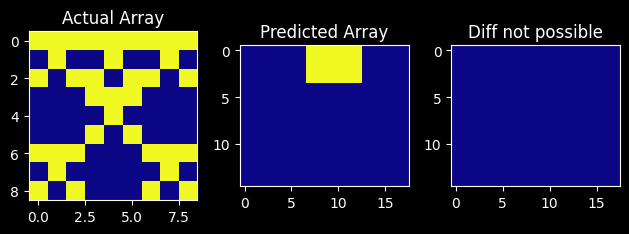

Training:  20%|██        | 30/150 [39:12<2:42:40, 81.34s/it]

Pruned 15 old entries and added 6 new entries.


Delete of nonexisting embedding ID: fa5b15a3-2425-4b37-9504-c7be3c309b72
Delete of nonexisting embedding ID: 80866d6a-a81c-4e53-b0f2-b73c0935ad61
Delete of nonexisting embedding ID: 1b0c74d8-baf7-4dd4-b283-c28d89701f69
Delete of nonexisting embedding ID: 52f169ac-c1e2-413a-b383-f6071736567e
Delete of nonexisting embedding ID: 539d058f-0d69-473d-b12f-fc8f0d498100
Delete of nonexisting embedding ID: a8c1d36f-4732-4b5c-9b56-5b358a169338
Delete of nonexisting embedding ID: f3d3f13f-f06a-41d4-85b5-efe8bfeec4a9
Delete of nonexisting embedding ID: 56509e27-aaf0-4026-b52f-865ed986b5da
Delete of nonexisting embedding ID: 5143c93a-eb53-47f7-8384-3561607a6085
Delete of nonexisting embedding ID: 073ebabb-8e25-4946-9f13-196742cf9d1c
Delete of nonexisting embedding ID: 22432176-6929-4dd6-afcf-226752c2d1df
Delete of nonexisting embedding ID: fa5b15a3-2425-4b37-9504-c7be3c309b72
Delete of nonexisting embedding ID: 80866d6a-a81c-4e53-b0f2-b73c0935ad61
Delete of nonexisting embedding ID: 1b0c74d8-baf7-4

Pruned 15 old entries and added 6 new entries.

Learned Knowledge Update:
['Integers and zeros in the grid interact with one another, where zeros act as '
 'barriers that restrict the movement of integers, influencing their final '
 'arrangement and clustering in the output grid.',
 'Transformation rules must account for the influence of neighboring cells, '
 'particularly how clusters of integers can spread into available positions '
 'while adhering to the boundaries set by zeros.',
 'The arrangement of integers can often reflect spatial relationships that '
 'develop from their proximity to one another, creating visually structured '
 'patterns in the output grids.',
 'Training examples should include a diverse range of configurations to '
 'enhance understanding of various transformation patterns, as reliance on '
 'limited examples can hamper learning.',
 'A feedback mechanism to systematically address discrepancies between '
 'expected and actual outputs can facilitate continuous

Delete of nonexisting embedding ID: 292f7110-ad51-4121-b3f1-27357455b931
Delete of nonexisting embedding ID: 3cc8aad6-c5f1-44b8-bb65-febabd013d48
Delete of nonexisting embedding ID: 1362bb9f-05c5-4f57-8db1-f4d30da114d0
Delete of nonexisting embedding ID: 0159e2b8-a96e-4117-92c3-ac95d95eb3f5
Delete of nonexisting embedding ID: 6aecfbf6-769d-4ae7-8dbf-7c5ce04da950
Delete of nonexisting embedding ID: 844cbdca-40b9-41fe-b0b2-775dd69d04b4
Delete of nonexisting embedding ID: 88130098-eee4-4bfb-8bef-25cfef2e9693
Delete of nonexisting embedding ID: 527beca6-b3e8-40b1-9678-4304a8fd1bc2
Delete of nonexisting embedding ID: 1564a1ed-2600-4909-ae78-4aeeaeac2ea0
Delete of nonexisting embedding ID: 58c7ccbc-de75-4785-a514-1c3b644eec85
Delete of nonexisting embedding ID: 8f042f47-8433-4653-a0aa-1c6ac51c0903
Delete of nonexisting embedding ID: 6c7bbd96-54e9-4d19-8344-881198e198a5
Delete of nonexisting embedding ID: 292f7110-ad51-4121-b3f1-27357455b931
Delete of nonexisting embedding ID: 3cc8aad6-c5f1-4

Pruned 15 old entries and added 4 new entries.

Learned Knowledge Update:
['Understanding the spatial relationship between integers and zeroes is '
 'crucial for accurately predicting matrix transformations. Applicability: Any '
 'task involving matrix manipulation where boundaries affect movement.',
 'Identifying transformation patterns requires analyzing previous examples to '
 'derive rules about integer clustering and spreading behavior in the output '
 'grid. Applicability: For tasks that require predicting outputs based on '
 'given input patterns.',
 'Integers tend to cluster, forming groups that move toward available spaces '
 'while adhering to the constraints posed by zeroes as barriers. '
 'Applicability: Useful in scenarios where matrix values are to be visualized '
 'or transformed based on surrounding values.',
 'Establishing clear criteria for the interactions between integers, '
 'particularly how they are affected by surrounding zeros, can significantly '
 'improve acc

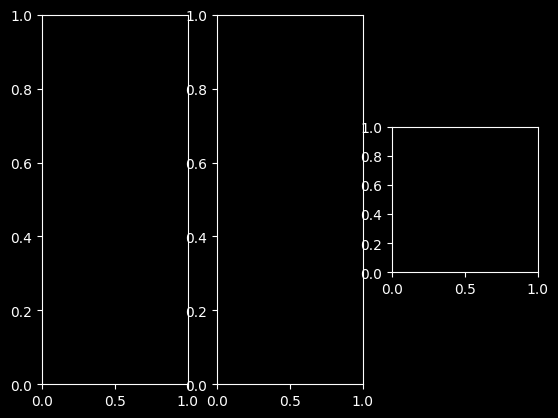

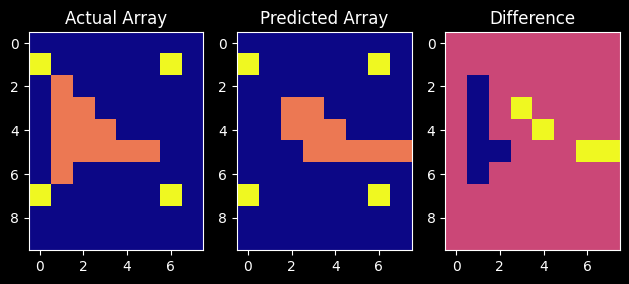

Training:  21%|██▏       | 32/150 [41:56<2:38:58, 80.84s/it]

Pruned 15 old entries and added 6 new entries.


Delete of nonexisting embedding ID: 2fcbcef9-6877-4ce5-a0b1-5bb4ddd40a5b
Delete of nonexisting embedding ID: 8718b37b-09f2-41a3-a915-1e32d55e0c4a
Delete of nonexisting embedding ID: 59210132-4b13-415a-ae3e-7b420f5dad37
Delete of nonexisting embedding ID: ee6bd169-60ea-4acc-9211-234de012fe30
Delete of nonexisting embedding ID: 161fb87b-3dd5-49af-acd9-cc9360ee9456
Delete of nonexisting embedding ID: 6ce5ce26-3672-4bd2-851d-f0aba245fec4
Delete of nonexisting embedding ID: 4f361faa-5188-4fa0-8b64-2e917466f7d4
Delete of nonexisting embedding ID: 050aa848-c8ee-4e6e-8d91-a529146c5ec6
Delete of nonexisting embedding ID: cd09bef5-d806-4151-a515-83ff29d76804
Delete of nonexisting embedding ID: 2b2de7b1-c4a2-42a9-8b24-e1e9c3cba9c0
Delete of nonexisting embedding ID: 47561b93-510d-479c-885f-bc1c6cf1217b
Delete of nonexisting embedding ID: a4003b1d-64cc-40a1-98d1-034e17710f28
Delete of nonexisting embedding ID: d8d00164-7401-4feb-9e44-6f03853ea80d
Delete of nonexisting embedding ID: 2fcbcef9-6877-4

Pruned 15 old entries and added 4 new entries.

Learned Knowledge Update:
['Zeros act as barriers that influence the placement and spreading rules of '
 'surrounding integers in a grid, leading to structured clustering behavior.',
 'Understanding the interactions of integers with zeros is crucial to '
 'accurately predicting transformations in image matrices.',
 'Revisiting transformation examples and analyzing integer relationships is an '
 'effective strategy to reinforce learning of spatial patterns.',
 'Incorporating visual aids, such as diagrams, can enhance the understanding '
 'of clustering and spatial relationships in grid transformations.',
 'Practicing with a variety of input configurations helps to generalize the '
 'transformation logic and improves performance in predicting outputs.']
DTW Score: 4.242640687119285


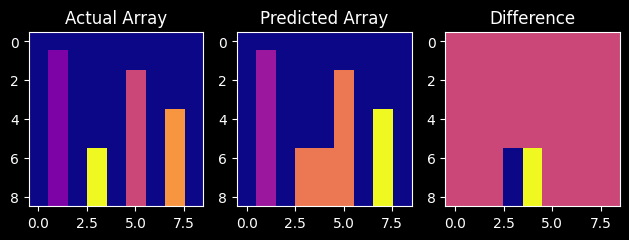

Training:  22%|██▏       | 33/150 [43:03<2:29:31, 76.68s/it]

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: 99230419-c461-4915-8d3d-f5671f645e2a
Delete of nonexisting embedding ID: eabb68e3-c55d-4e9c-869c-1deb0c60e987
Delete of nonexisting embedding ID: 56c4d1c2-3557-48f0-868e-cc08545587cb
Delete of nonexisting embedding ID: 86090a12-9de6-4bf1-a6e2-7c841ee90c93
Delete of nonexisting embedding ID: c4197b10-ab81-487d-8d25-deb626fac35c
Delete of nonexisting embedding ID: ddee0c4d-7cdc-4ddc-83cd-767fbfe31416
Delete of nonexisting embedding ID: 5eda129f-0f0d-4cb9-a302-54f8c9971544
Delete of nonexisting embedding ID: ba08253d-0b13-4314-b863-fd829b31d3a9
Delete of nonexisting embedding ID: 5d86240d-c7fa-48d3-8a18-9dfa0fbdff23
Delete of nonexisting embedding ID: 8e9d3ded-0b7c-41df-af11-682c78584e0e
Delete of nonexisting embedding ID: 2987057c-13eb-4fd9-8f54-93dd7f714c5e
Delete of nonexisting embedding ID: 2f9857de-a38c-4610-a93a-c675cfb2cb1c
Delete of nonexisting embedding ID: af1a246d-ae68-42b8-8ef2-5318bc8a8976
Delete of nonexisting embedding ID: 3394fb7c-1c7f-4

Pruned 15 old entries and added 3 new entries.

Learned Knowledge Update:
['Understanding that zeros in a grid can serve as barriers that influence the '
 'clustering and distribution of neighboring integers is critical for accurate '
 'transformations.',
 'Apply rigorous understanding of transformation rules from given examples to '
 'predict output grids effectively.',
 'Utilize clustering behaviors observed in previous transformations to inform '
 'current grid manipulations and predictions.',
 'Establish a pattern recognition approach for identifying relationships '
 'between integers in input grids and their expected transformations, '
 'facilitating improved output prediction.',
 'Implement visual aids or tools that can illustrate the spatial '
 'transformation logic and clustering behavior, enhancing comprehension of '
 'grid outputs.',
 'Create a feedback mechanism to analyze and compare predicted outputs with '
 'expected results, reinforcing learning and correction of misunde

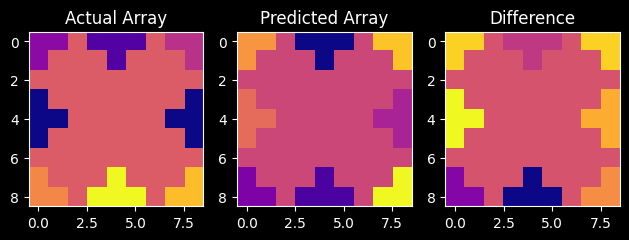

Training:  23%|██▎       | 34/150 [44:13<2:24:20, 74.66s/it]

Pruned 15 old entries and added 10 new entries.


Delete of nonexisting embedding ID: 4881cd29-d8fc-477d-8d12-27332e3e05db
Delete of nonexisting embedding ID: d3f2c90b-aad0-4507-932b-1a269f10d710
Delete of nonexisting embedding ID: 823b154b-d422-491a-8616-fd8646ab7154
Delete of nonexisting embedding ID: 31d650ef-509f-4f35-96c5-ddc49de0fde2
Delete of nonexisting embedding ID: d4073dee-d60d-43c5-884b-ae3860c848d8
Delete of nonexisting embedding ID: 0f763c93-a979-4fb7-93a0-5035790680fd
Delete of nonexisting embedding ID: 1b3c0df1-5878-40bc-97f8-0b066f2fd462
Delete of nonexisting embedding ID: ea6a96e3-b416-4859-af8d-b985fda0a05b
Delete of nonexisting embedding ID: 51f345f0-b894-444b-9971-ca51288d451e
Delete of nonexisting embedding ID: 65d3e34f-29c6-4e61-8ed5-e4bc7c085d1c
Delete of nonexisting embedding ID: 3e7a273b-a74d-4f24-bccb-32a469342626
Delete of nonexisting embedding ID: 3ca40525-b522-46d0-a232-b0919609dc91
Delete of nonexisting embedding ID: 2dcafc52-dfa2-424b-b15b-2053011105ba
Delete of nonexisting embedding ID: 49baf584-68dc-4

Pruned 15 old entries and added 4 new entries.

Learned Knowledge Update:
['Understand spatial transformation rules are formed by the relationship '
 'between integers and zeros in a grid, particularly how zeros influence the '
 'clustering and placement of integers.',
 "Clustering behaviors of certain integers (like '8') must be preserved during "
 'transformations, maintaining their relative spatial organization across '
 'different trials.',
 'Develop a systematic verification process to ensure output grids adhere to '
 'learned transformation rules and clustering logic, particularly focusing on '
 'high-frequency integer placements.',
 'Feedback loops should be incorporated into models to address discrepancies '
 'between predicted and expected outputs, facilitating a learning mechanism to '
 'refine predictions based on previous errors.',
 'Recognize the significance of specific integer placements within matrices, '
 'noting how their positions can dictate overall grid transformat

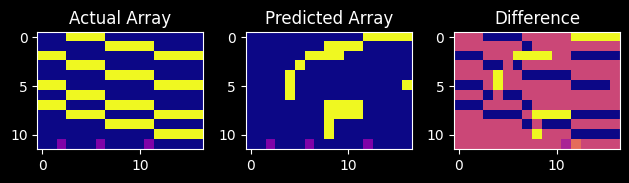

Training:  23%|██▎       | 35/150 [45:45<2:33:22, 80.03s/it]

Error in OpenAI API call: The output is incomplete due to a max_tokens length limit.
Error in OpenAI API call: The output is incomplete due to a max_tokens length limit.
Error in OpenAI API call: The output is incomplete due to a max_tokens length limit.


Training:  23%|██▎       | 35/150 [48:24<2:39:01, 82.97s/it]


IncompleteOutputException: The output is incomplete due to a max_tokens length limit.

In [5]:
from train_test_helper import train_and_evaluate

from logical_agents import (logic_concept_reasoning_network,
                            pattern_based_logical_reasoning_network)

reasoning_iterations=4
reasoning_agent=lambda prompt,input: pattern_based_logical_reasoning_network(f"{prompt}\n{input}", max_iterations=reasoning_iterations)
reasoning_agent=None
set_live_verbosity(0)

n = 150
import random

selected_data = random.sample(data, n)

results, train_dtw_scores, test_dtw_scores=train_and_evaluate(
    dataset=selected_data,  
    mlu=mlu,
    prompt_key="query",
    response_key="reply",
    epochs=1,
    test_size=0,
    train_batch_size=1,
    test_batch_size=1,
    initial_serial_items=1,
    logging=True,
    training_analysis_agent = reasoning_agent,
    testing_analysis_agent = reasoning_agent,
)

In [ ]:
print(train_dtw_scores, test_dtw_scores)

In [ ]:
#10#[0.0, [0.0], [0.0], [9.539392014169456], [0.0], [17.776388834631177], [2.0], [3.0], [0.0], [0.0]] []
#20#[26.68332812825267, [10.723805294763608], [26.90724809414742], [0.0], [0.0], [26.267851073127396], [13.379088160259652], [0.0], [0.0], [0.0], [22.627416997969522], [0.0], [0.0], [14.798648586948742], [0.0], [0.0], [16.46207763315433], [24.372115213907882], [32.0], [0.0]] []
#1#[0.0] []
#20#[0.0, [0.0], [0.0], [2.449489742783178], [0.0], [9.848857801796104], [6.244997998398398], [5.0990195135927845], [7.54983443527075], [19.544820285692065], [3.872983346207417], [13.114877048604], [8.48528137423857], [0.0], [0.0], [6.164414002968976], [8.366600265340756], [19.131126469708992], [24.166091947189145], [5.0]] []
#21#[0.0, [0.0], [0.0], [10.908712114635714], [0.0], [11.661903789690601], [18.947295321496416], [10.63014581273465], [4.898979485566356], [0.0], [5.656854249492381], [8.717797887081348], [16.0], [42.14261501141095], [0.0], [48.52834223420371], [0.0], [0.0], [22.693611435820433], [5.656854249492381], [0.0]] []
#10 (only OA)#[4.795831523312719, [0.0], [7.0710678118654755], [0.0], [0.0], [8.426149773176359], [23.664319132398465], [30.066592756745816], [0.0], [4.58257569495584]] []
#10 (with logical patter)#[8.426149773176359, [3.0], [12.489995996796797], [17.320508075688775], [3.4641016151377544], [6.0], [6.6332495807108], [4.123105625617661], [0.0], [14.696938456699069]] []
#20 #[25.865034312755125, [9.797958971132712], [21.2602916254693], [0.0], [0.0], [15.7797338380595], [1.7320508075688772], [7.483314773547883], [41.8568990729127], [6.082762530298219], [5.0], [0.0], [0.0], [2.8284271247461903], [0.0], [22.0], [8.48528137423857], [10.723805294763608], [9.486832980505138], [28.600699292150182], [8.06225774829855]] []

In [ ]:
mlu.print_knowledge_base()